In [1]:
from IPython.display import HTML

HTML('''<script>
function code_toggle() {
  if (code_shown){
    $('div.input').hide('500');
    $('#toggleButton').val('Show Code')
  } else {
    $('div.input').show('500');
    $('#toggleButton').val('Hide Code')
  }
  code_shown = !code_shown
}

$( document ).ready(function(){
  code_shown=false;
  $('div.input').hide()
});
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')


In [2]:
from IPython.display import HTML

HTML('''<img width="1024" height="1024" src="https://cavalieriretail.com/wp-content/uploads/2023/06/logo_web_middle_s_small.svg" class="attachment-large size-large ls-is-cached lazyloaded" alt="" decoding="async" data-src="https://cavalieriretail.com/wp-content/uploads/2023/06/logo_web_middle_s_small.svg">''')

In [3]:
from IPython.display import HTML

HTML('''<img width="1024" height="1024" src="https://cavalieriretail.com/wp-content/uploads/2023/06/paragrafi_0031_paragrafo-homepage-1024x1024.jpg">''')

# 🛍️ Cavalieri Retail Dataset Overview 📊

The **Cavalieri Retail Dataset** offers a  insight into the performance metrics of various retail store locations within a specific timeframe. It has  sales data, customer information, transaction statistics and ratings This dataset serves as a  resource for analyzing retail performance, increasing data-driven decisions for store enhancements, helping with  customer engagement strategies, and optimizing operational efficiency.

---

## Column Descriptions 📝

- **STORE:** Unique identifier for each store.
- **Location:** Name of the store's location.
- **ft2022:** Total sales for the year 2022.
- **ft2023:** Total sales for the year 2023.
- **delta_ft:** Percentage change in sales from 2022 to 2023.
- **transaction_numbers:** Total number of transactions.
- **entry_people:** Estimated foot traffic into the store.
- **percent_customer_sales:** Percentage of customers making a purchase.
- **avg_per_transc:** Average sales amount per transaction.
- **total_units_sold:** Total number of units sold.
- **units_per_transc:** Average units sold per transaction.
- **avg_price_item:** Average price of items sold.
- **size_store_mq:** Size of the store in square meters.
- **fte:** Full-time equivalent employees.
- **emp_numb_store:** Total number of employees.
- **ratings_boss:** Average rating for the store manager/boss.
- **Combined_Location:** Combined store identifier and location.
- **Latitude:** Geographical latitude of the store.
- **Longitude:** Geographical longitude of the store.

---

## Objectives 🎯

### Objective 1: Understand Sales Dynamics and Growth Opportunities

- Analyze year-over-year sales growth (**delta_ft**) to identify high-performing and underperforming stores.
- Examine the correlation between sales figures (**ft2022**, **ft2023**) and store size (**size_store_mq**) to assess the impact of physical space on sales.

### Objective 2: Enhance Customer Conversion and Retention

- Evaluate the conversion rate (**percent_customer_sales**) to determine the effectiveness of in-store promotions and layout.
- Investigate the relationship between foot traffic (**entry_people**) and transactions (**transaction_numbers**) to identify customer behavior trends.

### Objective 3: Optimize Operational Efficiency

- Assess average transaction value (**avg_per_transc**) and units per transaction (**units_per_transc**) for upselling and cross-selling opportunities.
- Analyze the ratio of full-time equivalent employees (**fte**) to transaction numbers to optimize staffing levels.

### Objective 4: Evaluate Product Pricing and Assortment Strategy

- Review average item price (**avg_price_item**) across locations to ensure competitive pricing and margin optimization.




<style>
h3 {
    color: #FF5722; /* Orange */
}

ul {
    list-style-type: none;
    margin-left: 20px;
}

section {
    border: 1px solid #ccc;
    padding: 10px;
    margin-bottom: 20px;
    border-radius: 5px;
}
</style>

<section>
<h3>★ Plan of Action ★</h3>

<ul>
    <li>Exploratory Data Analysis (EDA)</li>
    <li>Data Manipulation</li>
    <li>Feature Selection/Extraction</li>
    <li>Visualization</li>
    <li>Predictive Modelling</li>
    <li>Project Outcomes & Conclusion</li>
</ul>
</section>


### **Exploratory Data Analysis (EDA)** , **Feature Engineering** , **Data Manipulation**

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
import linear
import seaborn as sns
import os
import math
import base64
import folium
import time
import threading
from IPython.display import display
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from folium.plugins import MarkerCluster, FeatureGroupSubGroup, HeatMap, Search, MeasureControl, Fullscreen
from branca.colormap import linear
from IPython.display import Image, display
from branca.element import Template, MacroElement
from folium.map import FeatureGroup


file_path = 'updated_2file_path.xlsx'
df = pd.read_excel(file_path)



#### Remove Euro Sign in Financial Turnovers, remove non numeric characters  and convert to floats
#### Create new column Total Units Sold by multiplying UPT ( units per transaction) * Total Transactions (Scontrini)
#### Create new Columns Combined_Locations since multiple stores have same locations to identify better
#### Write code to get specific coordinates of store locations to visualize in the map and add 2 new columns Latitude and Longitude
#### Add new column Combined_Location to identify stores better since they are duplicate locations

In [5]:
df.head(5)

,STORE,Location,ft2022,ft2023,delta_ft,transacation_numbers,entry_people,percent_customer_sales,avg_per_transc,total_units_sold,units_per_transc,avg_price_item,size_store_mq,fte,emp_numb_store,ratings_boss,Combined_Location,Latitude,Longitude
0,2,Noventa,3816245.60,4742345.23,0.242673,76460,586225.0,0.130428,62.023872,140686.40,1.84,33.73,488.16,12.75,13,3.466667,2_Noventa,45.290628,11.539884
1,105,Noventa,1538814.00,1565071.00,0.017063,16681,175503.0,0.095047,93.823572,28024.08,1.68,55.69,150.00,6.00,6,2.400000,105_Noventa,45.290628,11.539884
2,120,Barberino,2901665.42,2658630.66,-0.083757,26487,294980.0,0.089793,100.374926,39465.63,1.49,67.40,399.00,6.50,7,2.800000,120_Barberino,43.986758,11.210919
3,109,Barberino,1010986.00,1080497.00,0.068756,11709,111535.0,0.104980,92.279187,19671.12,1.68,54.83,192.00,4.50,4,3.000000,109_Barberino,43.986758,11.210919
4,125,Franciacorta,2814506.16,2512718.49,-0.107226,25135,226810.0,0.110820,99.968907,39713.30,1.58,63.42,381.30,6.80,7,2.066667,125_Franciacorta,45.589187,10.076411


In [6]:
df.tail(5)

,STORE,Location,ft2022,ft2023,delta_ft,transacation_numbers,entry_people,percent_customer_sales,avg_per_transc,total_units_sold,units_per_transc,avg_price_item,size_store_mq,fte,emp_numb_store,ratings_boss,Combined_Location,Latitude,Longitude
139,85,SIENA,335048.97,281312.77,-0.160383,2872,12995.0,0.221008,97.950129,4652.64,1.62,60.48,100.0,2.000,2,3.600000,85_SIENA,43.167206,11.467561
140,66,parma,327440.30,333179.59,0.017528,3304,10862.0,0.304180,100.841280,4526.48,1.37,73.70,130.0,2.500,3,3.133333,66_parma,44.801368,10.328083
141,69,padova,289382.49,299441.05,0.034759,2656,18974.0,0.139981,112.741359,4010.56,1.51,74.36,129.0,1.975,2,1.133333,69_padova,45.407717,11.873446
142,82,PARMA,198257.34,174436.66,-0.120150,1671,5187.0,0.322152,104.390580,2840.70,1.70,61.57,185.0,2.000,2,3.933333,82_PARMA,44.801368,10.328083
143,38,PADOVA,115620.00,138719.00,0.199784,814,1430.0,0.569231,170.416462,993.08,1.22,143.32,25.0,1.750,2,2.733333,38_PADOVA,45.407717,11.873446


In [7]:
df.describe()

# The maximum financial turnover for 2022 is 3,816,246, and for 2023, it is 4,742,345.
# There is a significant variability in the financial turnover from one location to another, about 660,876.9
# We have some stores that have 0 financial turnover in 2022, indicitaing missing data and minimum was 57,812. 
# The mean values for ft2022 and ft2023 are around $1,007,640 and $1,073,253.
# The mean delta_ft is approximately 7.8% indicating an average increase in sales from 2022 to 2023.
# On average, there are around 4.34 full-time equivalent employees per store.
# The mean store size is about 184.58 square meters.
# On average, stores had about 11,157 transactions, with a considerable standard deviation, pointing to varied customer traffic across stores.
# The entry_people count shows significant variability as well, with an average of 107,585 
# The percent of customer sales averages at 13%, with some stores having as low as 4.48% conversion rate, which  highlight areas for improvement in customer engagement or sales tactics.
# The size of stores varies , from as small as 25 square meters to as large as 700 square meters, with an average size of approximately 185 square meters.
# Employee numbers with an average of about 4.69 employees per store 

,STORE,ft2022,ft2023,delta_ft,transacation_numbers,entry_people,percent_customer_sales,avg_per_transc,total_units_sold,units_per_transc,avg_price_item,size_store_mq,fte,emp_numb_store,ratings_boss,Latitude,Longitude
count,144.0000,1.440000e+02,1.440000e+02,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,73.3750,1.007640e+06,1.073253e+06,0.078797,11157.847222,107585.599792,0.132126,106.040351,16769.470486,1.467639,77.166181,184.576667,4.339618,4.687500,2.910648,44.474527,11.147088
std,42.1167,6.426516e+05,6.600738e+05,0.248863,9224.594395,91448.783995,0.070561,32.533607,15902.991295,0.170700,25.456581,99.955966,1.317367,1.421458,0.542185,1.474176,1.837865
min,1.0000,0.000000e+00,1.387190e+05,-0.256871,814.000000,1430.000000,0.044830,52.236607,993.080000,1.060000,30.520000,25.000000,1.750000,2.000000,1.133333,37.656151,7.577620
25%,37.7500,5.546028e+05,6.710441e+05,-0.044949,6190.750000,44463.000000,0.089865,91.966011,8994.932500,1.350000,61.810000,120.500000,3.750000,4.000000,2.600000,43.946504,9.774620
50%,73.5000,8.167212e+05,8.467965e+05,0.039866,8537.500000,89571.000000,0.108451,99.726247,12542.105000,1.440000,70.715000,159.000000,4.000000,5.000000,2.900000,44.833945,11.255576
75%,109.2500,1.317039e+06,1.371166e+06,0.140817,13507.250000,135814.500000,0.149881,111.230768,19971.780000,1.580000,89.132500,220.000000,5.000000,5.000000,3.200000,45.479006,12.224781
max,146.0000,3.816246e+06,4.742345e+06,1.665295,76460.000000,586225.000000,0.569231,264.032172,140686.400000,2.180000,165.330000,700.000000,12.750000,13.000000,3.933333,47.003740,16.596828


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STORE                   144 non-null    int64  
 1   Location                144 non-null    object 
 2   ft2022                  144 non-null    float64
 3   ft2023                  144 non-null    float64
 4   delta_ft                144 non-null    float64
 5   transacation_numbers    144 non-null    int64  
 6   entry_people            144 non-null    float64
 7   percent_customer_sales  144 non-null    float64
 8   avg_per_transc          144 non-null    float64
 9   total_units_sold        144 non-null    float64
 10  units_per_transc        144 non-null    float64
 11  avg_price_item          144 non-null    float64
 12  size_store_mq           144 non-null    float64
 13  fte                     144 non-null    float64
 14  emp_numb_store          144 non-null    in

In [9]:
df_no_duplicates = df.drop_duplicates()
print(df_no_duplicates)
## Drop duplicates

     STORE      Location      ft2022      ft2023  delta_ft  \
0        2       Noventa  3816245.60  4742345.23  0.242673   
1      105       Noventa  1538814.00  1565071.00  0.017063   
2      120     Barberino  2901665.42  2658630.66 -0.083757   
3      109     Barberino  1010986.00  1080497.00  0.068756   
4      125  Franciacorta  2814506.16  2512718.49 -0.107226   
..     ...           ...         ...         ...       ...   
139     85         SIENA   335048.97   281312.77 -0.160383   
140     66         parma   327440.30   333179.59  0.017528   
141     69        padova   289382.49   299441.05  0.034759   
142     82         PARMA   198257.34   174436.66 -0.120150   
143     38        PADOVA   115620.00   138719.00  0.199784   

     transacation_numbers  entry_people  percent_customer_sales  \
0                   76460      586225.0                0.130428   
1                   16681      175503.0                0.095047   
2                   26487      294980.0               

In [10]:
''' 
def clean_financial_turnover(value):
    if isinstance(value, str):=
        value = value.replace('€', '').strip()
        value = ''.join(filter(str.isdigit, value))
        return float(value) / 100  # Assuming the currency is in euros
    else:
        return value
df['Financial Turnover  2022'] = df['Financial Turnover  2022'].apply(clean_financial_turnover)
df['Financial Turnover  2023'] = df['Financial Turnover  2023'].apply(clean_financial_turnover) 

'''

" \ndef clean_financial_turnover(value):\n    if isinstance(value, str):=\n        value = value.replace('€', '').strip()\n        value = ''.join(filter(str.isdigit, value))\n        return float(value) / 100  # Assuming the currency is in euros\n    else:\n        return value\ndf['Financial Turnover  2022'] = df['Financial Turnover  2022'].apply(clean_financial_turnover)\ndf['Financial Turnover  2023'] = df['Financial Turnover  2023'].apply(clean_financial_turnover) \n\n"

In [11]:
df['Combined_Location'] = df['STORE'].astype(str) + '_' + df['Location']

In [12]:
df_no_duplicates = df.drop_duplicates()
df = df[df['ft2022'] != 0] # Drop 0 values in ft2022


In [13]:
null_values_sum = df.isna().sum()
print(null_values_sum)

STORE                     0
Location                  0
ft2022                    0
ft2023                    0
delta_ft                  0
transacation_numbers      0
entry_people              0
percent_customer_sales    0
avg_per_transc            0
total_units_sold          0
units_per_transc          0
avg_price_item            0
size_store_mq             0
fte                       0
emp_numb_store            0
ratings_boss              0
Combined_Location         0
Latitude                  0
Longitude                 0
dtype: int64


In [14]:
df.nunique().sort_values()

emp_numb_store              9
ratings_boss               35
fte                        49
Longitude                  55
Latitude                   55
units_per_transc           56
Location                   94
size_store_mq             116
avg_price_item            138
ft2022                    139
Combined_Location         141
STORE                     141
percent_customer_sales    141
entry_people              141
transacation_numbers      141
delta_ft                  141
ft2023                    141
avg_per_transc            141
total_units_sold          141
dtype: int64

In [15]:
df.head(5)

,STORE,Location,ft2022,ft2023,delta_ft,transacation_numbers,entry_people,percent_customer_sales,avg_per_transc,total_units_sold,units_per_transc,avg_price_item,size_store_mq,fte,emp_numb_store,ratings_boss,Combined_Location,Latitude,Longitude
0,2,Noventa,3816245.60,4742345.23,0.242673,76460,586225.0,0.130428,62.023872,140686.40,1.84,33.73,488.16,12.75,13,3.466667,2_Noventa,45.290628,11.539884
1,105,Noventa,1538814.00,1565071.00,0.017063,16681,175503.0,0.095047,93.823572,28024.08,1.68,55.69,150.00,6.00,6,2.400000,105_Noventa,45.290628,11.539884
2,120,Barberino,2901665.42,2658630.66,-0.083757,26487,294980.0,0.089793,100.374926,39465.63,1.49,67.40,399.00,6.50,7,2.800000,120_Barberino,43.986758,11.210919
3,109,Barberino,1010986.00,1080497.00,0.068756,11709,111535.0,0.104980,92.279187,19671.12,1.68,54.83,192.00,4.50,4,3.000000,109_Barberino,43.986758,11.210919
4,125,Franciacorta,2814506.16,2512718.49,-0.107226,25135,226810.0,0.110820,99.968907,39713.30,1.58,63.42,381.30,6.80,7,2.066667,125_Franciacorta,45.589187,10.076411


## Visualizations 

In [16]:
###   Code To get cooridnates based on city names  


""" locations = [
    'Noventa', 'Barberino', 'Franciacorta', 'Fidenza', 'Castelromano',
    'SCALO MILANO', 'Castelguelfo', 'Castelguelfo', 'Marcianise', 'NOVENTA',
    'MANTOVA', 'BARBERINO', 'VALDICHIANA', 'Vicolungo', 'FRANCIACORTA',
    'Orio', "Citta' S.Angelo", 'MANTOVA', 'Roma', 'SERRAVALLE',
    "Citta' S.Angelo", "Citta' S.Angelo", 'Arese', 'FIDENZA', 'ARESE',
    'CASTEL ROMANO', 'Franciacorta', 'Noventa', 'Fidenza', 'Palmanova',
    'Rimini', 'Castelguelfo', 'Fidenza', 'BRUGNATO', 'MODENA', 'modena',
    'Valmontone', 'Modena', 'Bologna', 'FIRENZE', 'Palmanova', 'Brennero',
    'Agira', 'Porta di Roma', 'BRUGNATO', 'NOVENTA', 'ORIO', 'ORIO',
    'Firenze', 'Vicolungo', 'firenze', 'SCALO MILANO', 'Firenze', 'RIMINI',
    'Mantova', 'BRENNERO', 'franciacorta', 'Barberino', 'Valdichiana',
    'PALMANOVA', 'Verona', 'MARGHERA', 'LIMBIATE', 'Euroma',
    'CHIETI', 'Valdichiana', 'bologna', 'Molfetta', 'BOLZANO', 'MARCIANISE',
    'Bologna', 'rimini', 'PESCHIERA BORROMEO', "Citta' S.Angelo", 'Modena',
    'MOLFETTA', 'Brennero', 'Orio', 'BUSNAGO', 'ferrara', 'Bolzano',
    'PESCHIERA BORROMEO', 'Antegnate', 'Brugnato', 'marghera', 'CITY LIFE',
    'Forte dei Marmi', 'Torino', 'Brugnato', 'LIMBIATE', 'Bologna', 'PORTELLO',
    'casalecchio', 'BUSNAGO', 'Marghera', 'Rimini', 'ascoli', 'Parma',
    'chieti', "Citta' S.Angelo", 'Padova', 'GRUGLIASCO', 'Rimini', 'Affi',
    'BOLOGNA', 'MANTOVA', 'CILENTO', 'FRANCIACORTA', 'Pesaro', 'ancona',
    'MARGHERA', 'RESCALDINA', 'PESCHIERA BORROMEO', 'ORIO', 'CASALECCHIO',
    'bolzano', 'RIMINI', 'ANTEGNATE', 'Casalecchio', 'Portello', 'Pescara',
    'CASTELGUELFO', 'pesaro', 'CITY LIFE', 'FERRARA', 'bologna',
    'FORTE DEI MARMI', 'lonato', 'FIRENZE', 'Casalecchio', 'Marcianise',
    'Casalecchio', 'SIENA', 'parma', 'PESCHIERA BORROMEO', 'Bologna',
    'padova', 'CITY LIFE', 'BOLOGNA', 'PARMA', 'PADOVA', 'bologna', 'Modena',
    'Marghera'
]
def get_coordinates(location):
    geolocator = Nominatim(user_agent="heatmap_visualization")
    location_data = geolocator.geocode(location + ", Italy")
    if location_data:
        return location_data.latitude, location_data.longitude
    else:
        print(f"Coordinates not found for {location}")
        return None, None
df = {'Location': locations}
df_locations = pd.DataFrame(data)
df_locations['Latitude'], df_locations['Longitude'] = zip(*df_locations['Location'].apply(get_coordinates))
df_locations = df_locations.dropna()
df_merged = pd.merge(df, df_locations, on='Location', how='inner')
italy_map = folium.Map(location=[42.504154, 12.646361], zoom_start=6)
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df_merged.iterrows()]
HeatMap(heat_data).add_to(italy_map)
italy_map.save("retail_store_heatmap.html")

"""

' locations = [\n    \'Noventa\', \'Barberino\', \'Franciacorta\', \'Fidenza\', \'Castelromano\',\n    \'SCALO MILANO\', \'Castelguelfo\', \'Castelguelfo\', \'Marcianise\', \'NOVENTA\',\n    \'MANTOVA\', \'BARBERINO\', \'VALDICHIANA\', \'Vicolungo\', \'FRANCIACORTA\',\n    \'Orio\', "Citta\' S.Angelo", \'MANTOVA\', \'Roma\', \'SERRAVALLE\',\n    "Citta\' S.Angelo", "Citta\' S.Angelo", \'Arese\', \'FIDENZA\', \'ARESE\',\n    \'CASTEL ROMANO\', \'Franciacorta\', \'Noventa\', \'Fidenza\', \'Palmanova\',\n    \'Rimini\', \'Castelguelfo\', \'Fidenza\', \'BRUGNATO\', \'MODENA\', \'modena\',\n    \'Valmontone\', \'Modena\', \'Bologna\', \'FIRENZE\', \'Palmanova\', \'Brennero\',\n    \'Agira\', \'Porta di Roma\', \'BRUGNATO\', \'NOVENTA\', \'ORIO\', \'ORIO\',\n    \'Firenze\', \'Vicolungo\', \'firenze\', \'SCALO MILANO\', \'Firenze\', \'RIMINI\',\n    \'Mantova\', \'BRENNERO\', \'franciacorta\', \'Barberino\', \'Valdichiana\',\n    \'PALMANOVA\', \'Verona\', \'MARGHERA\', \'LIMBIATE\', \'Eurom

In [17]:
icon_base64 = "iVBORw0KGgoAAAANSUhEUgAAABwAAAAcCAMAAABF0y+mAAAA9lBMVEX////n7/WXudlTksglfb75+flspb8AZ6FZlsClwtvC1ehOkrx8rsT//v7m8e4AkndgrJ7v9vVNpJUhmH/0+vQmqzWb0aGu2atUt1gcqSu13bOJypA7r0WhxmWszXzx9uiJuTKTv1LS5L2NvUTv8NG9vADZ25L49uPT1X3EwSH312733IH00lb0xxLxvgD0zTr6pAD86Mv5nAD88N75z476xnz4pxr737n6rjX0awD77ef70rz0gCPzcQD738/0gWL2i2782M/0qZb2nYi+xcbz8/PP1dbh4eEAAACsqquWlJXw8PBdW1xGQ0Q2NDRtbGx9e3yamZrjwWpqAAABCUlEQVR4AazHQwLDAAAAwa1t27YRJ/9/U91G185pl3/weH1+v8/rwS0QDIUj0WgkFooncEim0plPZXMZbPKFIpTKlUq5CrU6No0mrXan22p1e73880z0ByQGQxiNYDyhNRhhms6YzhktlsvFiNXs+ab1hu2O9R4ORzZrTmd+Epfr7oIgAkgyl6t8waQkriqaDmBcUQIBFdO9NTLAABiGoWhggN0qSX7XrO3uf5m1uhFsA3uI/z2ChElUlQbWw0IargNJALaR0WFDlLnP5HTzj1y/JEGH3E11votLkLX1IQWAzb4FqVgpILBYvb43EoRFLe4ZGDxfacdMgaXCE3NyNHrADi/Fj0w/cALrpC4lvSA7rAAAAABJRU5ErkJggg=="
icon_bytes = base64.b64decode(icon_base64)
icon_base64_str = base64.b64encode(icon_bytes).decode('utf-8')
map_advanced = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)
main_marker_cluster = MarkerCluster().add_to(map_advanced)
feature_group_high = FeatureGroup(name='High Growth', show=False).add_to(map_advanced)
feature_group_medium = FeatureGroup(name='Stable', show=False).add_to(map_advanced)
feature_group_low = FeatureGroup(name='Decline', show=True).add_to(map_advanced)


# Gen

heatmap_data = df[['Latitude', 'Longitude', 'ft2023']].values.tolist()
HeatMap(heatmap_data, radius=15, blur=15, min_opacity=0.5, max_val=max(df['ft2023'])).add_to(map_advanced)

for idx, row in df.iterrows():
    delta_ft_percentage = row['delta_ft'] * 100  
    ft2023_formatted = f"{row['ft2023']:,.2f}"  
    if row['delta_ft'] > 0.10:
        category = 'High Growth'
    elif 0.01 <= row['delta_ft'] <= 0.10:
        category = 'Stable'
    else:
        category = 'Decline'
    delta_ft_percentage = f"{row['delta_ft'] * 100:.2f}%"
    ft2023_formatted = f"€{row['ft2023']:,.2f}"
    percent_customer_sales_formatted = f"{row['percent_customer_sales']*100:.2f}%"
    avg_per_transc_formatted = f"€{row['avg_per_transc']:,.2f}"
    total_units_sold_formatted = f"{row['total_units_sold']:,.2f}"
    avg_price_item_formatted = f"€{row['avg_price_item']:,.2f}"
    size_store_mq_formatted = f"{row['size_store_mq']:.2f} sqm"
    popup_content = f"""
    <div>
        <h4 style="color: #0078A8; margin-bottom: 5px;">Location: {row['Location']}</h4>
        <p><strong style="color: #20B2AA;">Employees:</strong> <span style="color: #DB7093;">{row['fte']}</span></p>
        <p><strong style="color: #20B2AA;">Ratings Boss:</strong> <span style="color: #DB7093;">{row['ratings_boss']}</span></p>
        <p><strong style="color: #20B2AA;">FT2023:</strong> <span style="color: #DB7093;">{ft2023_formatted}</span></p>
        <p><strong style="color: #20B2AA;">Delta FT:</strong> <span style="color: #DB7093;">{delta_ft_percentage}</span></p>
        <p><strong style="color: #20B2AA;">Transaction Numbers:</strong> <span style="color: #DB7093;">{row['transacation_numbers']}</span></p>
        <p><strong style="color: #20B2AA;">Entry People:</strong> <span style="color: #DB7093;">{row['entry_people']}</span></p>
        <p><strong style="color: #20B2AA;">Percent Customer Sales:</strong> <span style="color: #DB7093;">{percent_customer_sales_formatted}</span></p>
        <p><strong style="color: #20B2AA;">Avg Per Transaction:</strong> <span style="color: #DB7093;">{avg_per_transc_formatted}</span></p>
        <p><strong style="color: #20B2AA;">Total Units Sold:</strong> <span style="color: #DB7093;">{total_units_sold_formatted}</span></p>
        <p><strong style="color: #20B2AA;">Units Per Transc:</strong> <span style="color: #DB7093;">{row['units_per_transc']}</span></p>
        <p><strong style="color: #20B2AA;">Avg Price Item:</strong> <span style="color: #DB7093;">{avg_price_item_formatted}</span></p>
        <p><strong style="color: #20B2AA;">Size Store (sqm):</strong> <span style="color: #DB7093;">{size_store_mq_formatted}</span></p>
    </div>
    """
    marker = folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(html=popup_content, max_width=300),
        icon=folium.CustomIcon(icon_image=f"data:image/png;base64,{icon_base64_str}", icon_size=(43, 41))  # Specify path to your custom icon for each category
    )
    
    if category == 'High Growth':
        marker.add_to(feature_group_high)
    elif category == 'Stable':
        marker.add_to(feature_group_medium)
    else:  
        marker.add_to(feature_group_low)
folium.LayerControl(collapsed=False).add_to(map_advanced)
measure_control = MeasureControl(primary_length_unit='kilometers', primary_area_unit='hectares')
map_advanced.add_child(measure_control)
fullscreen = Fullscreen()
map_advanced.add_child(fullscreen)
map_advanced

# Heatmaps related to financial turnover 
# Filters for High growth - deltaft > 10%
# Stable - deltaft 0-10 %
# Decline - deltaft all negative %

C:\Users\mhaxh\AppData\Local\Temp\ipykernel_58704\1571813133.py:14: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heatmap_data, radius=15, blur=15, min_opacity=0.5, max_val=max(df['ft2023'])).add_to(map_advanced)


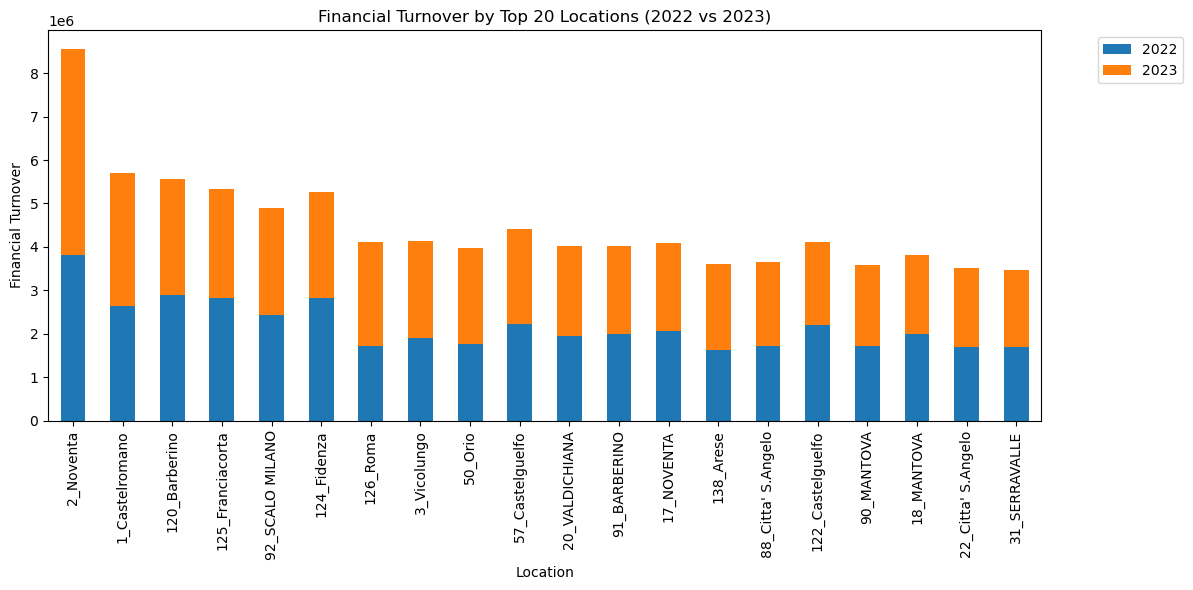

In [18]:
top_20_locations = df.sort_values(by='ft2023', ascending=False).head(20)
top_20_locations[['Combined_Location', 'ft2022', 'ft2023']].set_index('Combined_Location').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Financial Turnover by Top 20 Locations (2022 vs 2023)')
plt.ylabel('Financial Turnover')
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.legend(['2022', '2023'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

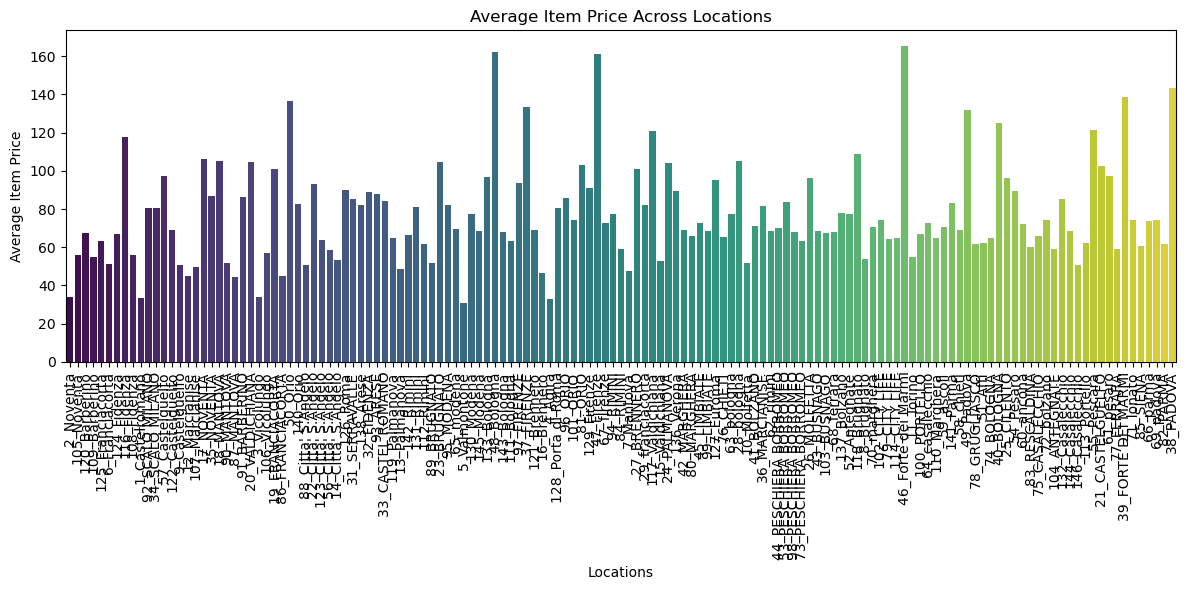

In [19]:

locations = df['Combined_Location']
avg_price_item = df['avg_price_item']

plt.figure(figsize=(12, 6))
sns.barplot(x=locations, y=avg_price_item, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Item Price Across Locations')
plt.xlabel('Locations')
plt.ylabel('Average Item Price')
plt.tight_layout()
plt.show()



### Run the code again to find average price by location name

In [20]:

data = {
    "avg_price_item": [
        143.32, 138.57, 165.33, 61.57, 73.7,
        124.87, 133.28, 97.09, 131.79, 64.55,
        89.23, 63.37, 121.23, 60.48, 62.17,
        63.4, 67.97, 67.57, 51.64, 59.91,
        66.85, 59.23, 83.39, 64.81, 72.09,
        90.99, 67.72, 104.5, 162.24, 68.07,
        70.36, 161.02, 102.83, 59.22, 93.25,
        77.39, 65.16, 61.89, 50.42, 58.82,
        61.43, 77.51, 69.29, 63.81, 82.03,
        65.65, 93.46, 49.85, 74.23, 74.36,
        85.12, 30.52, 77.5, 32.73, 64.72,
        33.73, 68.76, 34.02, 70.28, 72.89,
        70.97, 68.82, 82.32, 96.84, 57.12,
        54.7, 74, 84.45, 33.63, 63.42,
        83.64, 104.72, 104.97, 80.33, 51.68,
        51.64, 68.63, 54.83, 62.23, 52.97,
        72.58, 64.59, 68.39, 86.87, 117.87,
        72.86, 44.21, 68.42, 53.14, 85.69,
        53.78, 66.04, 56, 89.1, 120.86,
        58.44, 77.96, 55.69, 50.87, 68.76,
        68.76, 101.03, 50.53, 74.37, 74,
        89.81, 66.75, 81.46, 67.4, 64.52,
        70.46, 51.29, 101.08, 45.09, 106.35,
        44.7, 97.1, 57.07, 47.62, 96.03,
        66.62, 89.28, 82.72, 68.6, 87.09,
        46.66, 68.87, 102.57, 104.25, 96.44,
        68.71, 82.28, 95.03, 80.84, 80.59,
        48.83, 86.12, 90.86, 87.71, 85,
        77.59, 80.6, 108.97, 105
    ],
    "Location": [
        "PADOVA", "FORTE DEI MARMI", "Forte dei Marmi", "PARMA", "parma",
        "BOLOGNA", "FIRENZE", "pesaro", "Padova", "BOLOGNA", "Pesaro",
        "Bologna", "Pescara", "SIENA", "Portello", "PESCHIERA BORROMEO",
        "PESCHIERA BORROMEO", "BUSNAGO", "BRUGNATO", "RESCALDINA", "PORTELLO",
        "FERRARA", "Parma", "CITY LIFE", "ancona", "Firenze", "Bologna",
        "BRUGNATO", "Bologna", "ferrara", "ascoli", "Firenze", "ORIO",
        "RIMINI", "Citta' S.Angelo", "bologna", "CHIETI", "Rimini",
        "Citta' S.Angelo", "ANTEGNATE", "GRUGLIASCO", "Antegnate", "modena",
        "Citta' S.Angelo", "franciacorta", "CASALECCHIO", "FIRENZE",
        "Marcianise", "bolzano", "padova", "SERRAVALLE", "Valmontone", "Modena",
        "Agira", "Marghera", "Noventa", "chieti", "Vicolungo",
        "PESCHIERA BORROMEO", "LIMBIATE", "BOLZANO", "Brennero", "MODENA",
        "Bologna", "Modena", "Torino", "ORIO", "CASTEL ROMANO", "Castelromano",
        "Franciacorta", "PESCHIERA BORROMEO", "VALDICHIANA", "MANTOVA",
        "SCALO MILANO", "MANTOVA", "Molfetta", "Orio", "LIMBIATE", "Barberino",
        "Affi", "Valdichiana", "firenze", "Palmanova", "rimini", "NOVENTA",
        "Fidenza", "casalecchio", "MANTOVA", "Modena", "Citta' S.Angelo",
        "ORIO", "Brugnato", "MARGHERA", "Fidenza", "FIDENZA", "Valdichiana",
        "Citta' S.Angelo", "Bolzano", "Noventa", "Castelguelfo", "Castelguelfo",
        "BRENNERO", "Casalecchio", "lonato", "CITY LIFE", "Roma", "Fidenza",
        "MARCIANISE", "Barberino", "CITY LIFE", "marghera", "Franciacorta",
        "FRANCIACORTA", "FRANCIACORTA", "NOVENTA", "Marcianise", "Castelguelfo",
        "Vicolungo", "Mantova", "MOLFETTA", "Rimini", "Verona", "Orio",
        "BUSNAGO", "CITY LIFE", "Brennero", "MARGHERA", "CASTELGUELFO",
        "PALMANOVA", "CILENTO", "Casalecchio", "Arese", "Euroma", "Rimini",
        "Porta di Roma", "Palmanova", "BARBERINO", "Marghera", "ARESE",
        "Casalecchio", "RIMINI", "SCALO MILANO", "Brugnato", "bologna"
    ]
}

df_avg_price = pd.DataFrame(data)

def get_avg_price(location):
    avg_price = df_avg_price[df_avg_price['Location'].str.upper() == location.upper()]['avg_price_item'].mean()
    return avg_price

def plot_histogram(location):
    # Calculate average prices for all locations
    avg_prices = df_avg_price.groupby('Location')['avg_price_item'].mean().sort_values(ascending=False)
    top_10_locations = avg_prices.head(10)
    plt.figure(figsize=(10, 6))
    plt.hist(df['avg_price_item'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(x=get_avg_price(location), color='red', linestyle='--', linewidth=1.5, label=f'Average Price in {location}')
    plt.xlabel('Average Price')
    plt.ylabel('Frequency')
    plt.title('Histogram of Average Prices')
    plt.legend()
    plt.show()
    plt.clf()

def run_code():
    while True:
        location_input = input("Enter the name of the city: ")
        average_price = get_avg_price(location_input)
        if not pd.isnull(average_price):
            print(f"The average price in {location_input} is: {average_price}")
            plot_histogram(location_input)
            time.sleep(10)
        else:
            print("Location not found in the dataset. Please enter a valid location.")

thread = threading.Thread(target=run_code)
thread.start()

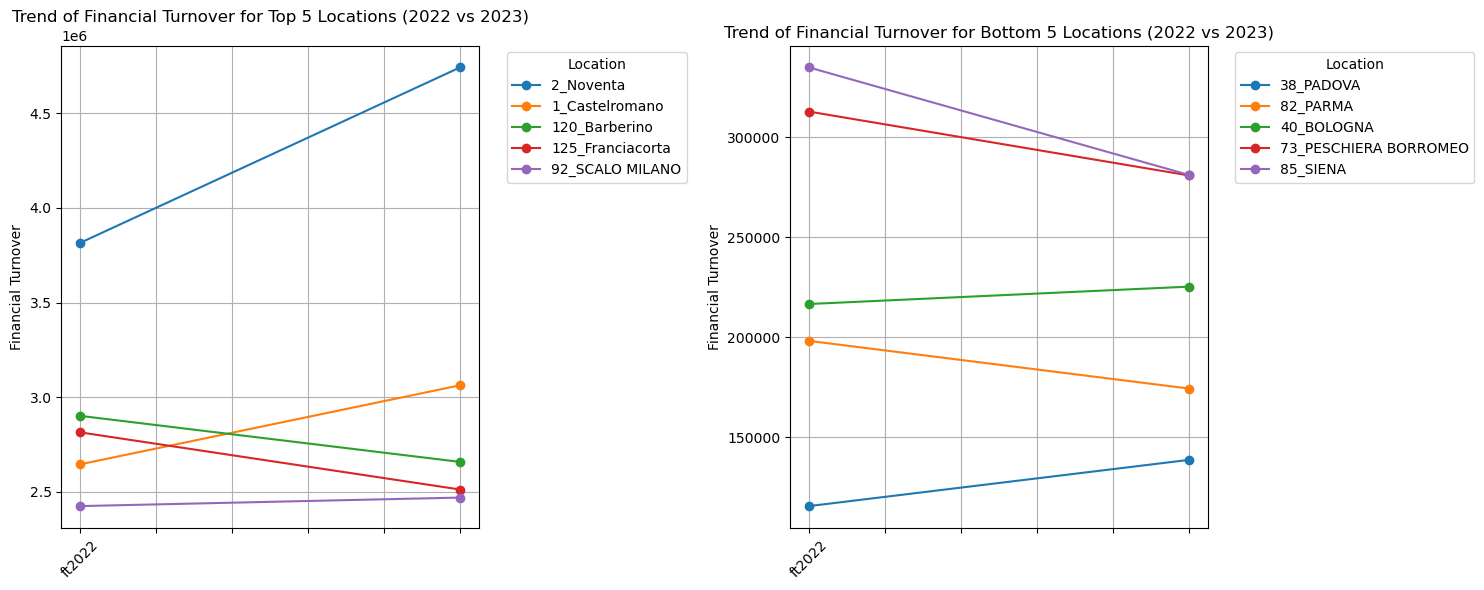

In [21]:
top_5_locations = df.sort_values(by='ft2023', ascending=False).head(5)
top_5_locations.set_index('Combined_Location', inplace=True)
ax1 = plt.subplot(121)
top_5_locations[['ft2022', 'ft2023']].T.plot(kind='line', figsize=(15, 6), marker='o', ax=ax1)
plt.title('Trend of Financial Turnover for Top 5 Locations (2022 vs 2023)')
plt.ylabel('Financial Turnover')
plt.xticks(rotation=45)
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
bottom_5_locations = df.sort_values(by='ft2023', ascending=True).head(5)
bottom_5_locations.set_index('Combined_Location', inplace=True)
ax2 = plt.subplot(122)
bottom_5_locations[['ft2022', 'ft2023']].T.plot(kind='line', figsize=(15, 6), marker='o', ax=ax2)
plt.title('Trend of Financial Turnover for Bottom 5 Locations (2022 vs 2023)')
plt.ylabel('Financial Turnover')
plt.xticks(rotation=45)
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

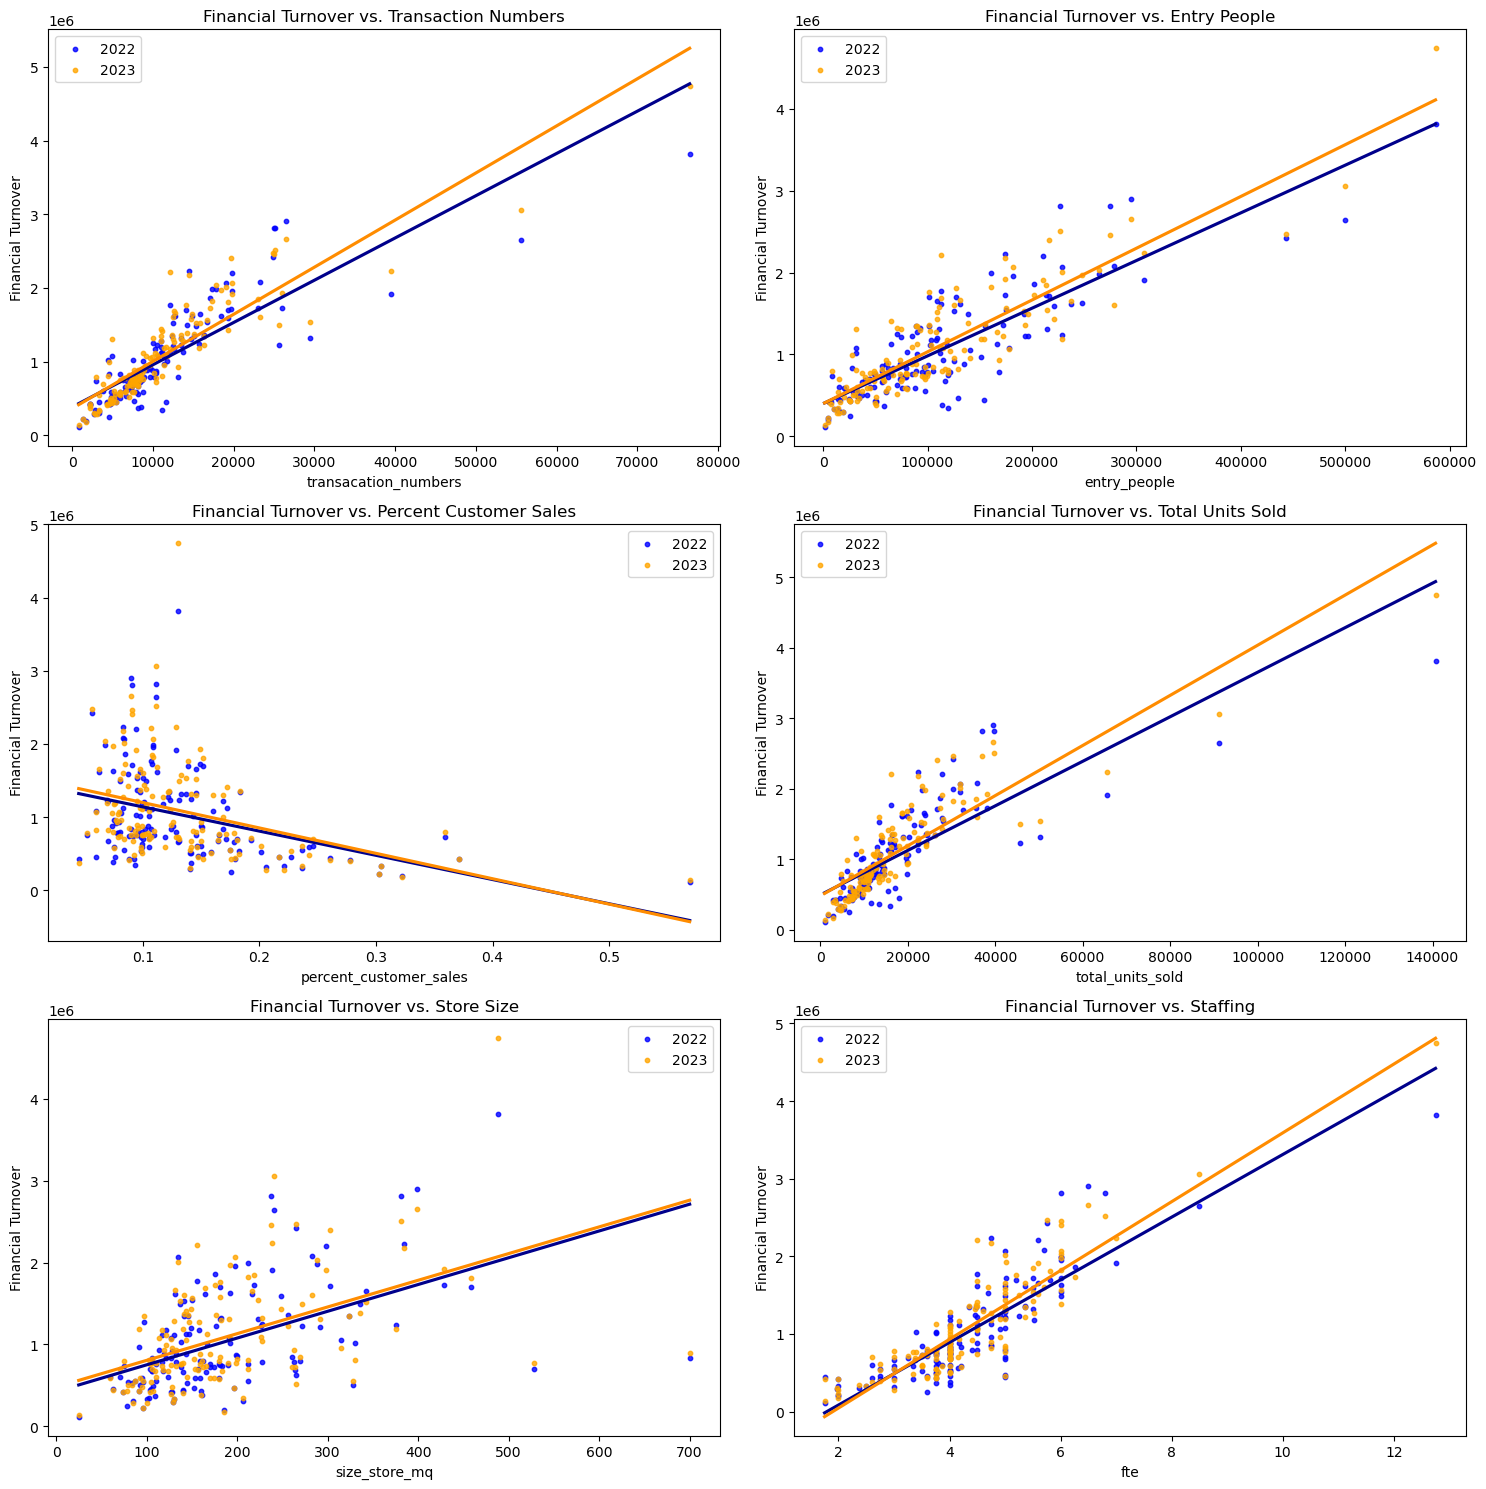

In [22]:

titles = [
    "Financial Turnover vs. Transaction Numbers",
    "Financial Turnover vs. Entry People",
    "Financial Turnover vs. Percent Customer Sales",
    "Financial Turnover vs. Total Units Sold",
    "Financial Turnover vs. Store Size",
    "Financial Turnover vs. Staffing"
]
columns_to_plot = [
    "transacation_numbers",
    "entry_people",
    "percent_customer_sales",
    "total_units_sold",
    "size_store_mq",
    "fte"
]

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for i, column in enumerate(columns_to_plot):
    sns.regplot(ax=axs[i // 2, i % 2], x=df[column], y=df['ft2022'], label='2022', color='blue', scatter_kws={'s':10}, line_kws={'color': 'darkblue'}, ci=None)
    sns.regplot(ax=axs[i // 2, i % 2], x=df[column], y=df['ft2023'], label='2023', color='orange', scatter_kws={'s':10}, line_kws={'color': 'darkorange'}, ci=None)
    axs[i // 2, i % 2].set_title(titles[i])
    axs[i // 2, i % 2].set_xlabel(column)
    axs[i // 2, i % 2].set_ylabel('Financial Turnover')
    axs[i // 2, i % 2].legend()

plt.tight_layout()
plt.show()


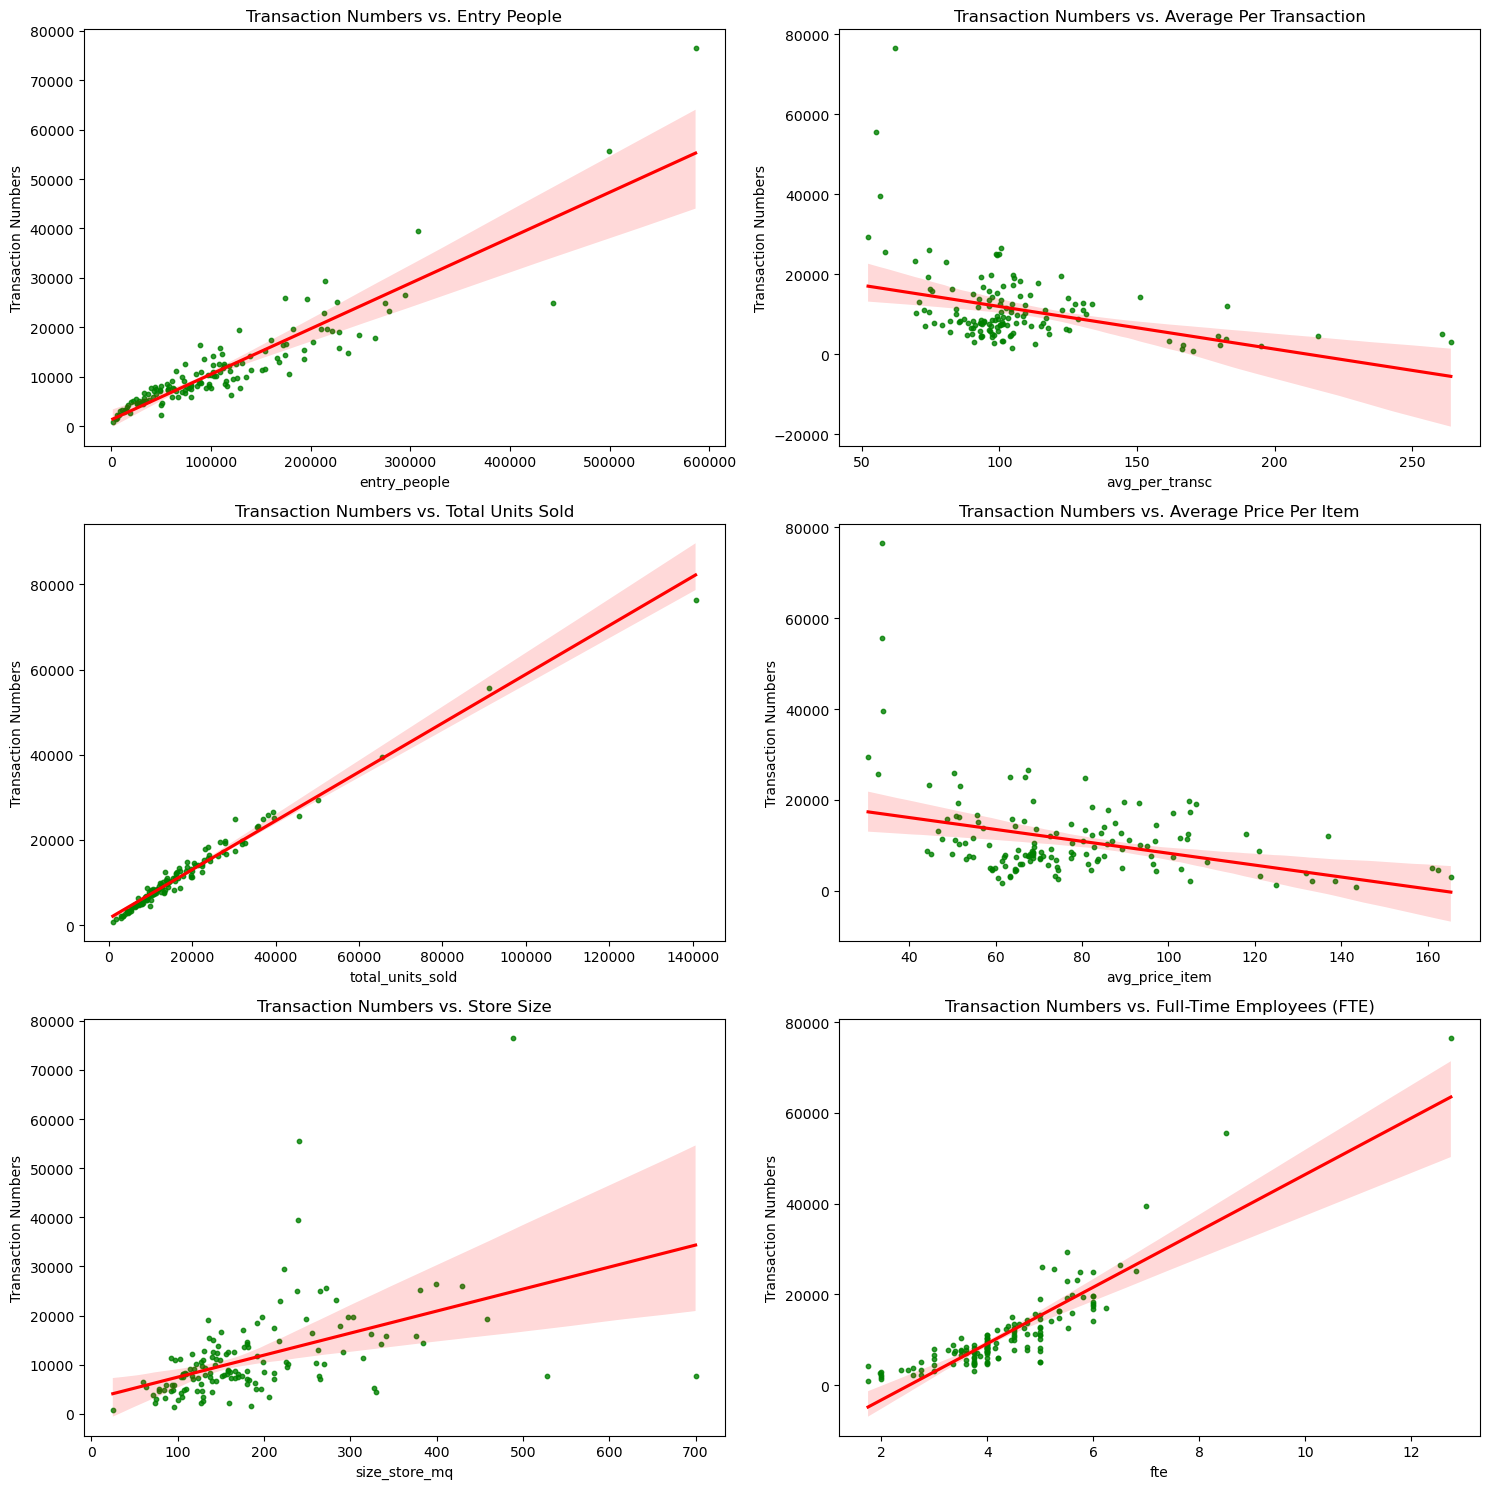

In [23]:

new_titles = [
    "Transaction Numbers vs. Entry People",
    "Transaction Numbers vs. Average Per Transaction",
    "Transaction Numbers vs. Total Units Sold",
    "Transaction Numbers vs. Average Price Per Item",
    "Transaction Numbers vs. Store Size",
    "Transaction Numbers vs. Full-Time Employees (FTE)"
]

new_columns_to_plot = [
    "entry_people",
    "avg_per_transc",
    "total_units_sold",
    "avg_price_item",
    "size_store_mq",
    "fte"
]

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for i, column in enumerate(new_columns_to_plot):
    sns.regplot(ax=axs[i // 2, i % 2], x=df[column], y=df['transacation_numbers'], color='green', scatter_kws={'s':10}, line_kws={'color': 'red'})
    axs[i // 2, i % 2].set_title(new_titles[i])
    axs[i // 2, i % 2].set_xlabel(column)
    axs[i // 2, i % 2].set_ylabel('Transaction Numbers')
plt.tight_layout()
plt.show()


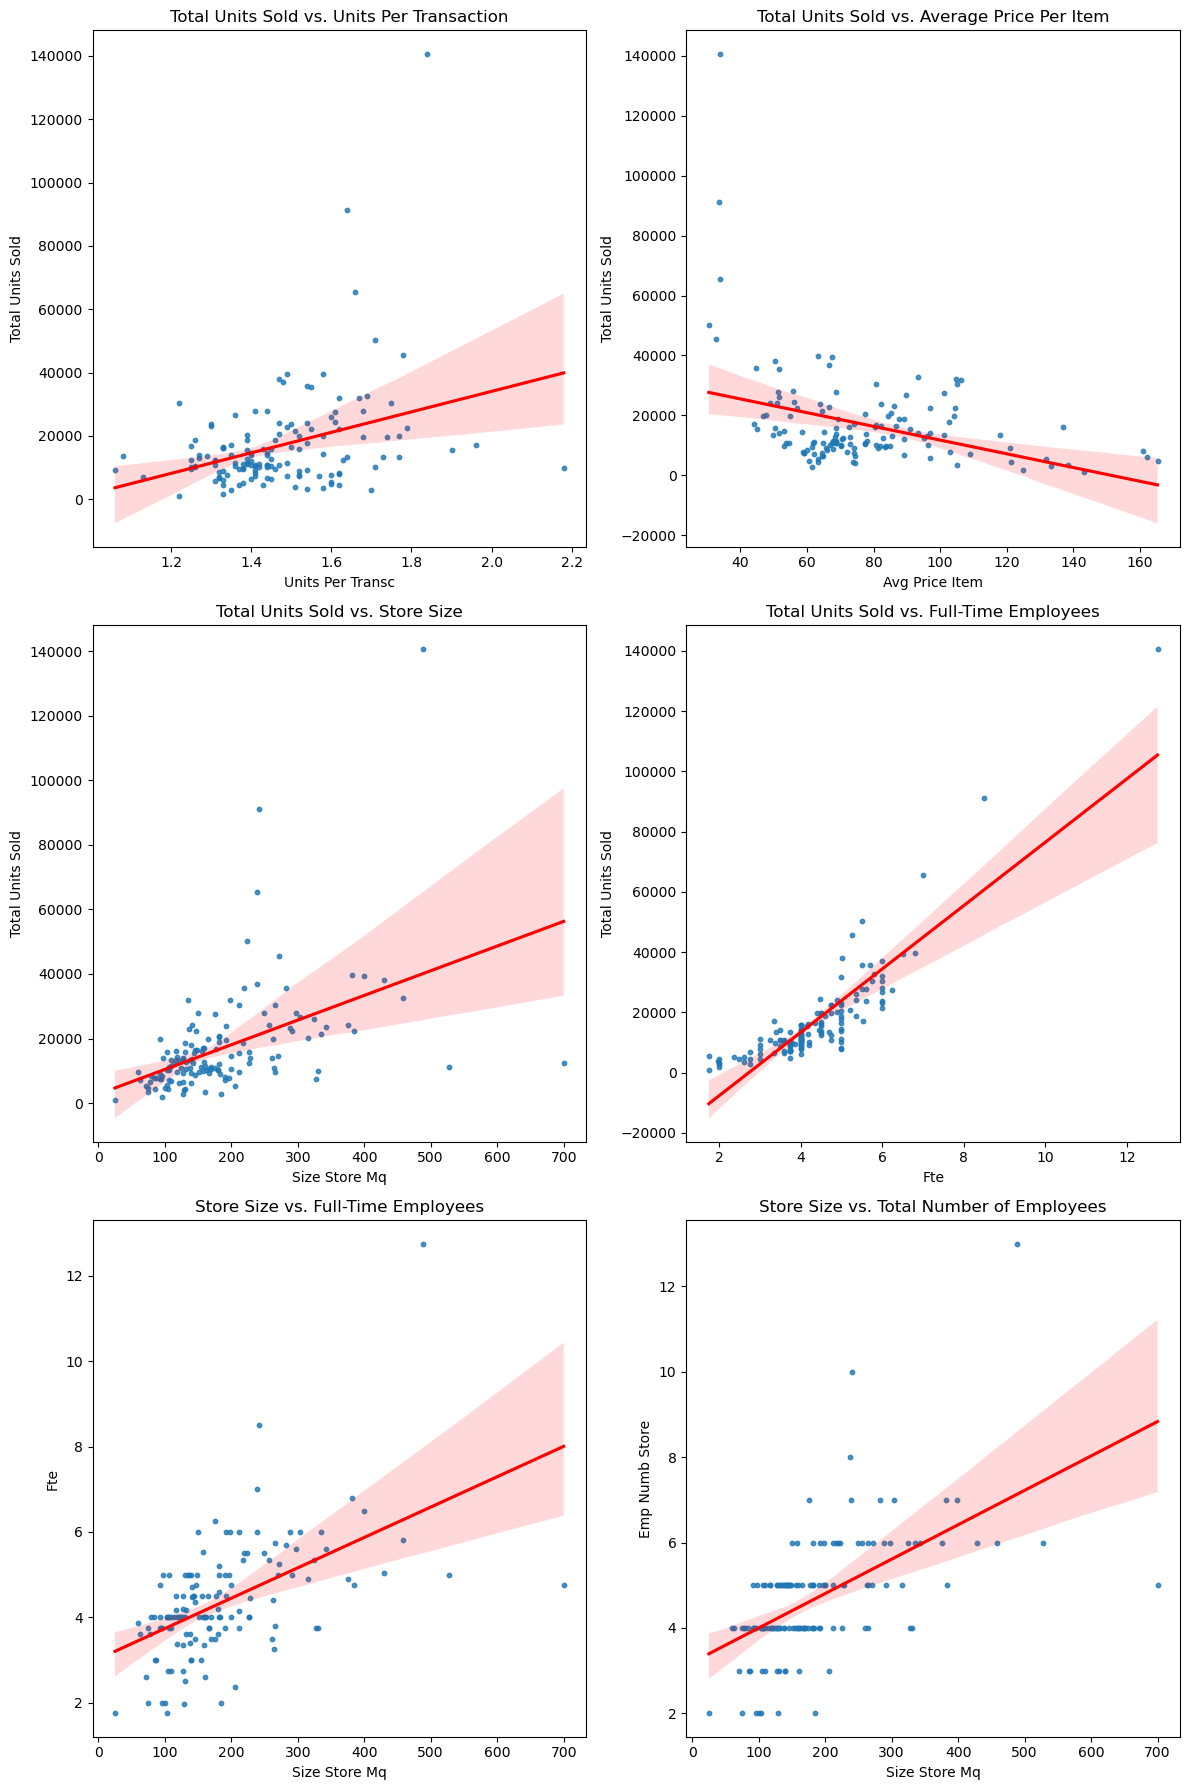

In [24]:

fig, axs = plt.subplots(3, 2, figsize=(12, 18))
new_relationship_titles = [
    "Total Units Sold vs. Units Per Transaction",
    "Total Units Sold vs. Average Price Per Item",
    "Total Units Sold vs. Store Size",
    "Total Units Sold vs. Full-Time Employees",
    "Store Size vs. Full-Time Employees",
    "Store Size vs. Total Number of Employees"
]
new_relationships_x = [
    "units_per_transc",
    "avg_price_item",
    "size_store_mq",
    "fte",
    "size_store_mq",  
    "size_store_mq"   
]

new_relationships_y = [
    "total_units_sold",
    "total_units_sold",
    "total_units_sold",
    "total_units_sold",
    "fte",  
    "emp_numb_store"  
]
for i, (x_col, y_col) in enumerate(zip(new_relationships_x, new_relationships_y)):
    sns.regplot(ax=axs[i // 2, i % 2], x=df[x_col], y=df[y_col], scatter_kws={'s':10}, line_kws={'color': 'red'}) 
    axs[i // 2, i % 2].set_title(new_relationship_titles[i])
    axs[i // 2, i % 2].set_xlabel(x_col.replace('_', ' ').title())
    axs[i // 2, i % 2].set_ylabel(y_col.replace('_', ' ').title())
if len(new_relationship_titles) % 2 != 0:
    axs[-1, -1].set_visible(False)
plt.tight_layout()
plt.show()


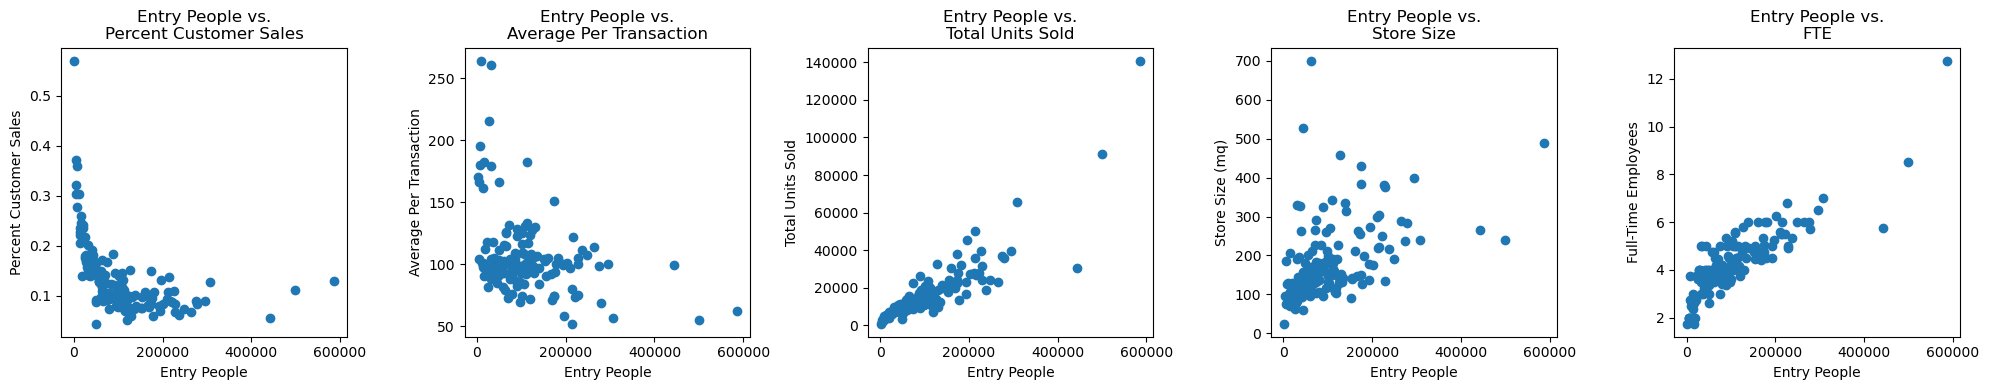

In [25]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
axs[0].scatter(df['entry_people'], df['percent_customer_sales'])
axs[0].set_title('Entry People vs.\nPercent Customer Sales')
axs[0].set_xlabel('Entry People')
axs[0].set_ylabel('Percent Customer Sales')
axs[1].scatter(df['entry_people'], df['avg_per_transc'])
axs[1].set_title('Entry People vs.\nAverage Per Transaction')
axs[1].set_xlabel('Entry People')
axs[1].set_ylabel('Average Per Transaction')
axs[2].scatter(df['entry_people'], df['total_units_sold'])
axs[2].set_title('Entry People vs.\nTotal Units Sold')
axs[2].set_xlabel('Entry People')
axs[2].set_ylabel('Total Units Sold')
axs[3].scatter(df['entry_people'], df['size_store_mq'])
axs[3].set_title('Entry People vs.\nStore Size')
axs[3].set_xlabel('Entry People')
axs[3].set_ylabel('Store Size (mq)')
axs[4].scatter(df['entry_people'], df['fte'])
axs[4].set_title('Entry People vs.\nFTE')
axs[4].set_xlabel('Entry People')
axs[4].set_ylabel('Full-Time Employees')
plt.tight_layout()
plt.show()


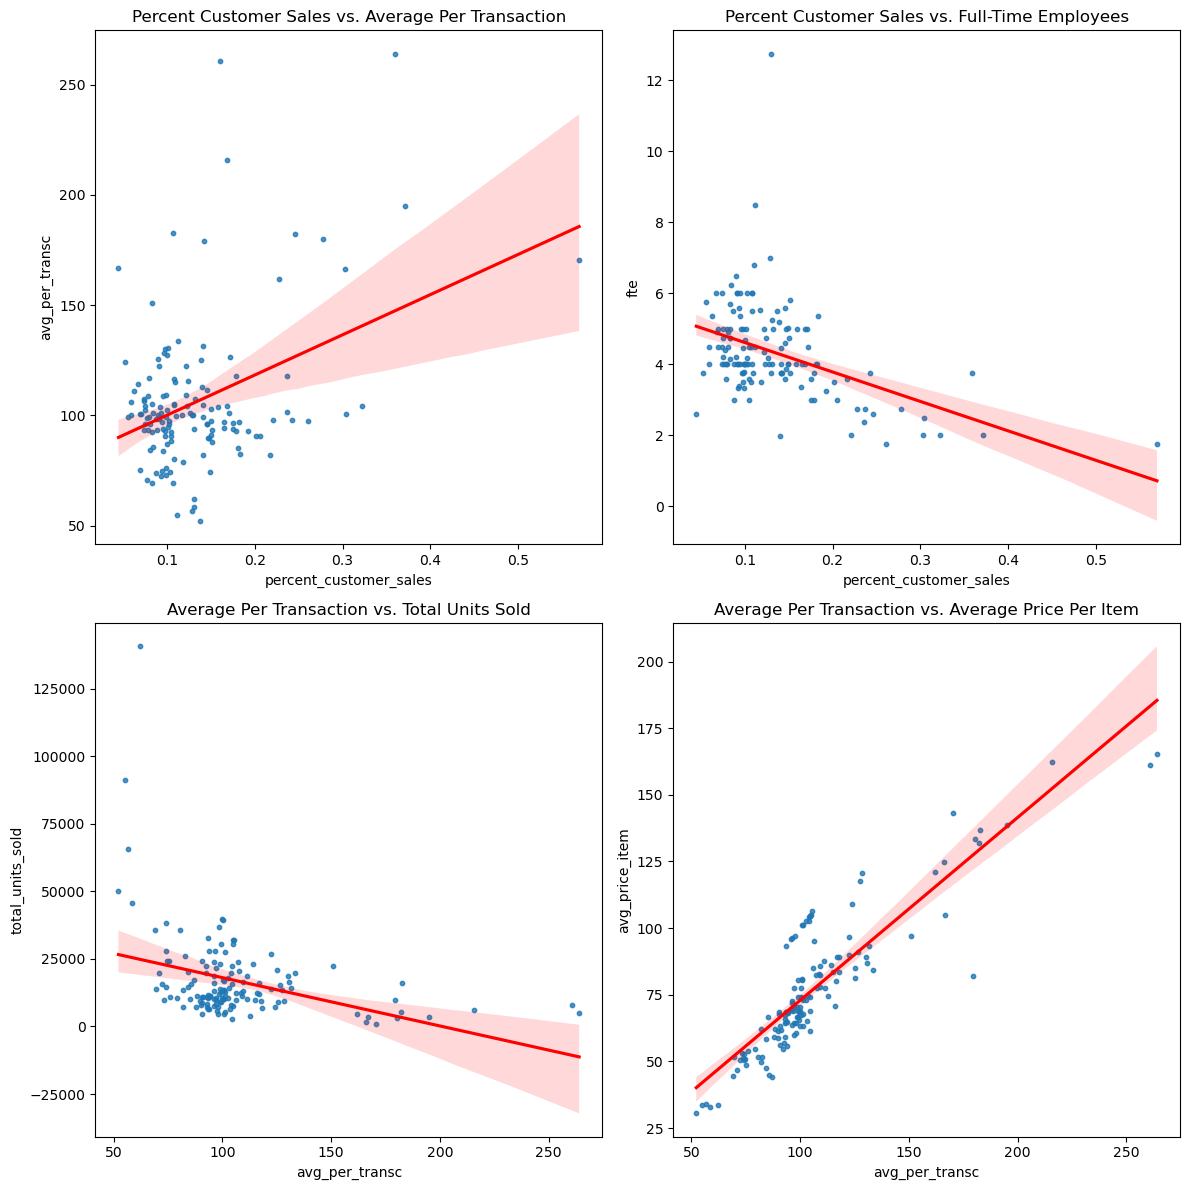

In [26]:

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
new_titles_2 = [
    "Percent Customer Sales vs. Average Per Transaction",
    "Percent Customer Sales vs. Full-Time Employees",
    "Average Per Transaction vs. Total Units Sold",
    "Average Per Transaction vs. Average Price Per Item"
]
new_columns_x = [
    "percent_customer_sales",
    "percent_customer_sales",
    "avg_per_transc",
    "avg_per_transc"
]
new_columns_y = [
    "avg_per_transc",
    "fte",
    "total_units_sold",
    "avg_price_item"
]
for i, (x_col, y_col) in enumerate(zip(new_columns_x, new_columns_y)):
    sns.regplot(ax=axs[i // 2, i % 2], x=df[x_col], y=df[y_col], scatter_kws={'s':10}, line_kws={'color': 'red'})
    axs[i // 2, i % 2].set_title(new_titles_2[i])
    axs[i // 2, i % 2].set_xlabel(x_col)
    axs[i // 2, i % 2].set_ylabel(y_col)
plt.tight_layout()
plt.show()

In [27]:
def get_top_bottom_stores(df, column):
    top_5 = df.sort_values(by=column, ascending=False).head(5)
    bottom_5 = df.sort_values(by=column, ascending=True).head(5)
    return top_5, bottom_5
top_5_total_units_sold, bottom_5_total_units_sold = get_top_bottom_stores(df, 'total_units_sold')
top_5_avg_per_transc, bottom_5_avg_per_transc = get_top_bottom_stores(df, 'avg_per_transc')
top_5_transacation_numbers, bottom_5_transacation_numbers = get_top_bottom_stores(df, 'transacation_numbers')
(top_5_total_units_sold[['STORE', 'Location', 'total_units_sold']],
 bottom_5_total_units_sold[['STORE', 'Location', 'total_units_sold']],
 top_5_avg_per_transc[['STORE', 'Location', 'avg_per_transc']],
 bottom_5_avg_per_transc[['STORE', 'Location', 'avg_per_transc']],
 top_5_transacation_numbers[['STORE', 'Location', 'transacation_numbers']],
 bottom_5_transacation_numbers[['STORE', 'Location', 'transacation_numbers']])

(    STORE      Location  total_units_sold
 0       2       Noventa         140686.40
 9       1  Castelromano          91225.00
 24      3     Vicolungo          65533.48
 50      5    Valmontone          50299.65
 62      4         Agira          45642.76,
      STORE         Location  total_units_sold
 143     38           PADOVA            993.08
 121     40          BOLOGNA           1803.48
 142     82            PARMA           2840.70
 59      37          FIRENZE           2978.10
 137     39  FORTE DEI MARMI           3335.64,
      STORE         Location  avg_per_transc
 108     46  Forte dei Marmi      264.032172
 68      47          Firenze      260.862145
 55      48          Bologna      215.777826
 137     39  FORTE DEI MARMI      195.086796
 28      50             Orio      182.670491,
     STORE      Location  avg_per_transc
 50      5    Valmontone       52.236607
 9       1  Castelromano       55.069440
 24      3     Vicolungo       56.597145
 62      4         Agir

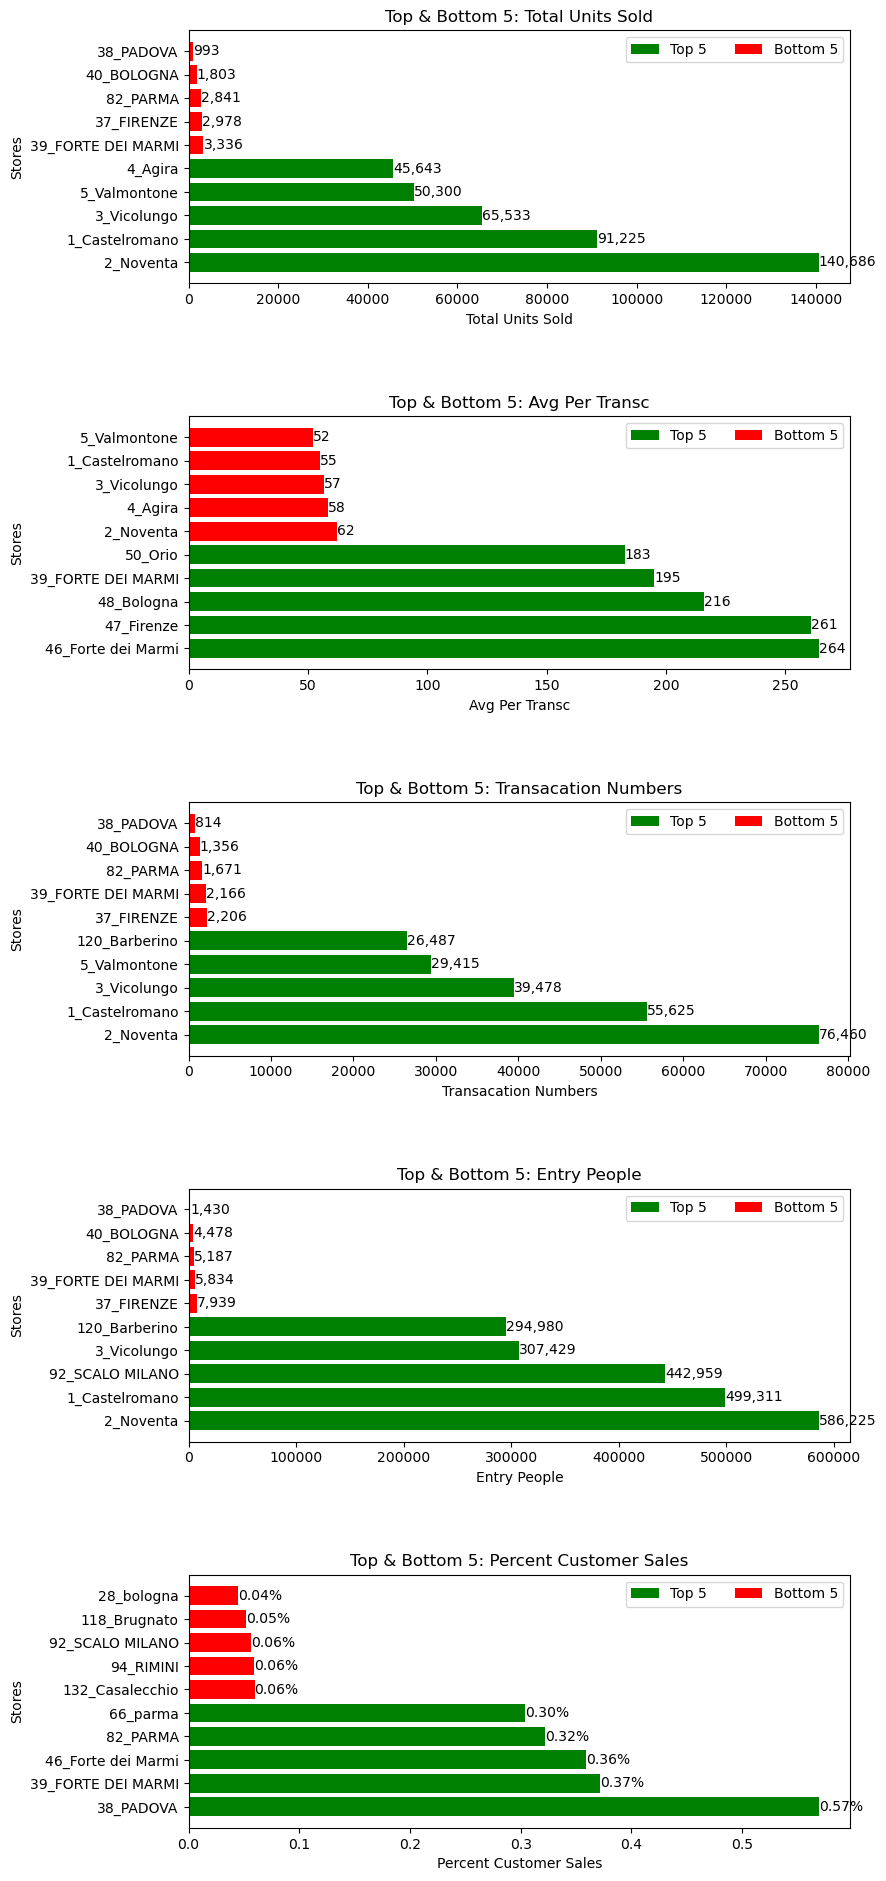

In [28]:
columns_to_visualize = ['total_units_sold', 'avg_per_transc', 'transacation_numbers', 'entry_people', 'percent_customer_sales']
def get_top_bottom_stores_viz_with_percent_legend(df, columns):
    n_rows = len(columns)
    fig, axs = plt.subplots(n_rows, 1, figsize=(10, 4 * n_rows))
    if n_rows == 1:
        axs = [axs]

    for i, column in enumerate(columns):
        top_5, bottom_5 = get_top_bottom_stores(df, column)
        combined = pd.concat([top_5, bottom_5]).sort_values(by=column, ascending=False)
        colors = ['green' if x in top_5['STORE'].values else 'red' for x in combined['STORE']]
        bars = axs[i].barh(combined['Combined_Location'], combined[column], color=colors)
        top_bar = plt.Rectangle((0,0),1,1,fc="green", edgecolor = 'none')
        bottom_bar = plt.Rectangle((0,0),1,1,fc='red', edgecolor = 'none')
        axs[i].legend([top_bar, bottom_bar], ['Top 5', 'Bottom 5'], loc=1, ncol = 2, prop={'size':10})
        axs[i].set_title(f'Top & Bottom 5: {column.replace("_", " ").title()}')
        axs[i].set_xlabel(column.replace("_", " ").title())
        axs[i].set_ylabel('Stores')

        for bar, value in zip(bars, combined[column]):
            text_value = f'{value:.2f}%' if column == 'percent_customer_sales' else f'{value:,.0f}'
            axs[i].text(value, bar.get_y() + bar.get_height()/2, text_value, va='center')

    plt.tight_layout(pad=5.0)  

    plt.show()

get_top_bottom_stores_viz_with_percent_legend(df, columns_to_visualize)


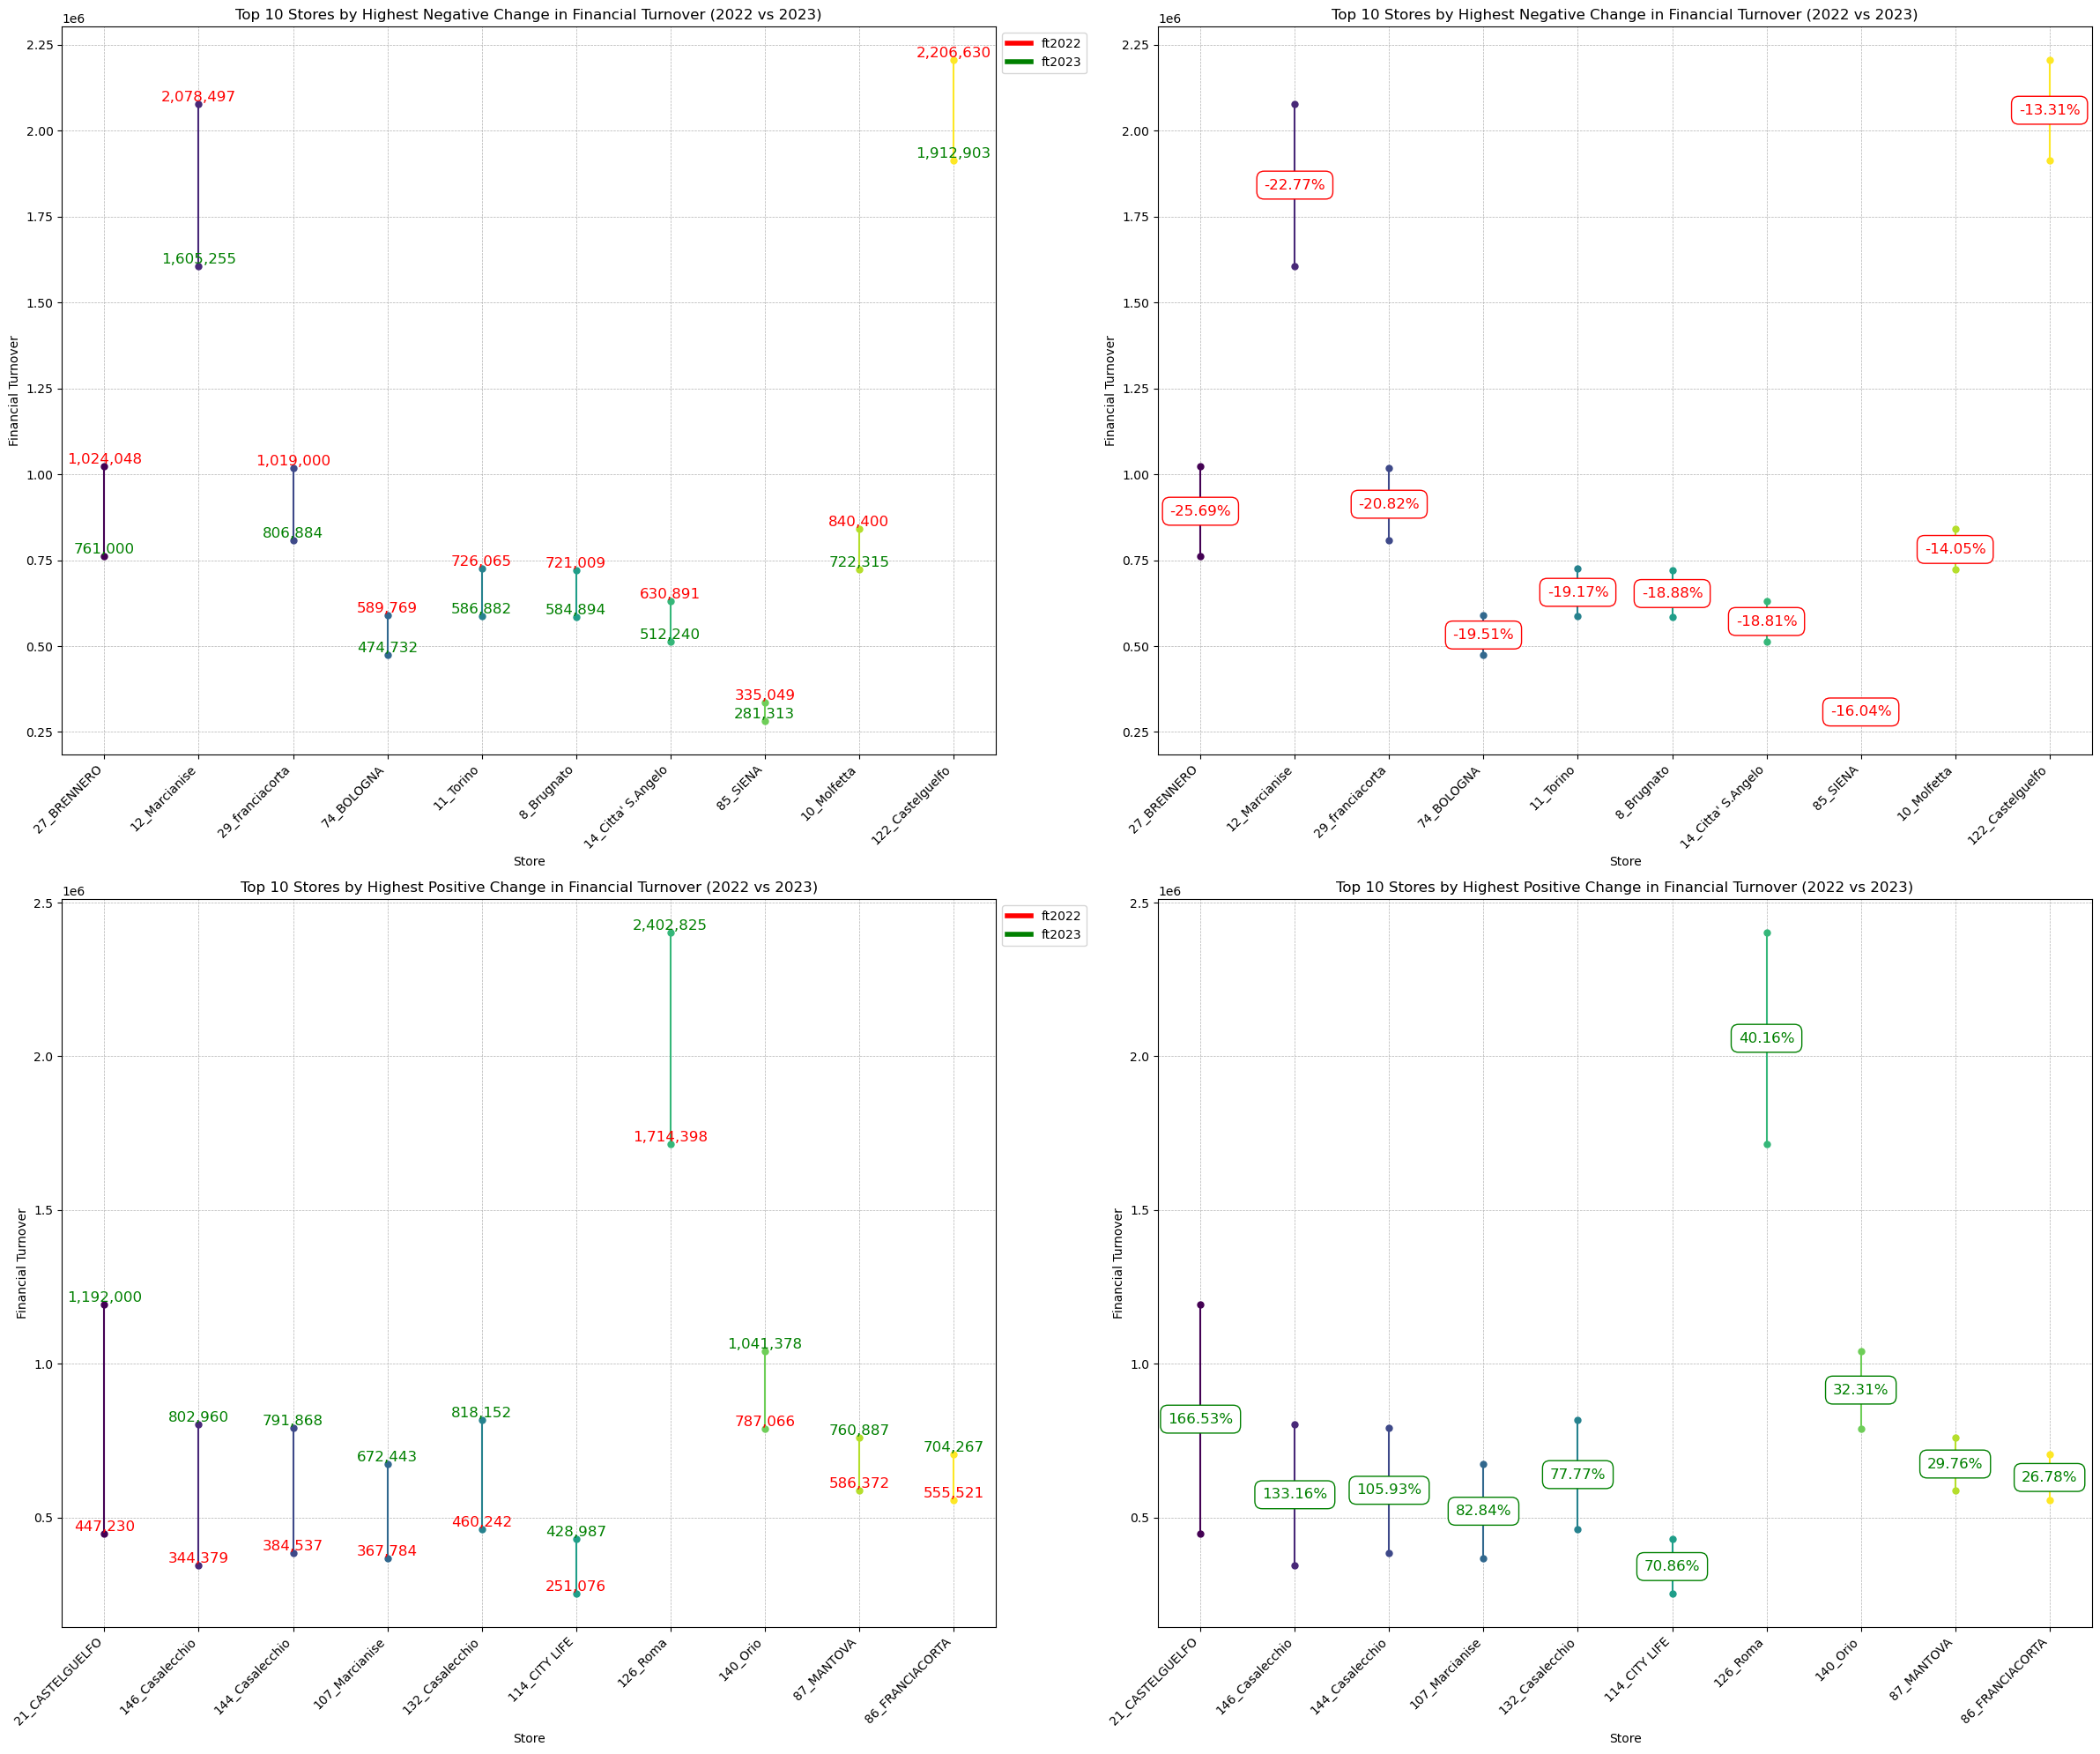

In [29]:

negative_turnover_change = df[df['delta_ft'] < 0]
top_negative_changes = negative_turnover_change.sort_values('delta_ft', ascending=True).head(10)
positive_change_df = df[df['delta_ft'] > 0]
top_changes = positive_change_df.sort_values('delta_ft', ascending=False).head(10)
plt.figure(figsize=(24, 20))  
plt.subplot(2, 2, 1)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_negative_changes)))
for (i, (index, row)), color in zip(enumerate(top_negative_changes.iterrows()), colors):
    plt.plot([i, i], [row['ft2022'], row['ft2023']], 'o-', color=color, markersize=5)
    plt.text(i, row['ft2022'], f"{row['ft2022']:,.0f}", ha='center', va='bottom', 
             fontsize=12, color='red')  
    plt.text(i, row['ft2023'], f"{row['ft2023']:,.0f}", ha='center', va='bottom', 
             fontsize=12, color='green') 
plt.legend(handles=[Line2D([0], [0], color='red', lw=4, label='ft2022'),
                    Line2D([0], [0], color='green', lw=4, label='ft2023')], loc='upper left', bbox_to_anchor=(1,1))
plt.title('Top 10 Stores by Highest Negative Change in Financial Turnover (2022 vs 2023)')
plt.xlabel('Store')
plt.ylabel('Financial Turnover')
plt.xticks(range(len(top_negative_changes)), top_negative_changes['Combined_Location'], rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.subplot(2, 2, 2)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_negative_changes)))

for (i, (index, row)), color in zip(enumerate(top_negative_changes.iterrows()), colors):
    plt.plot([i, i], [row['ft2022'], row['ft2023']], 'o-', color=color, markersize=5)
    percent_change = row['delta_ft'] * 100
    mid_point = row['ft2022'] + (row['ft2023'] - row['ft2022']) / 2
    plt.text(i, mid_point, f"{percent_change:.2f}%", ha='center', va='center',color='red', fontsize=12, backgroundcolor='white',
             bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))

plt.title('Top 10 Stores by Highest Negative Change in Financial Turnover (2022 vs 2023)')
plt.xlabel('Store')
plt.ylabel('Financial Turnover')
plt.xticks(range(len(top_negative_changes)), top_negative_changes['Combined_Location'], rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.subplot(2, 2, 3)

colors = plt.cm.viridis(np.linspace(0, 1, len(top_changes)))

for (i, (index, row)), color in zip(enumerate(top_changes.iterrows()), colors):
    plt.plot([i, i], [row['ft2022'], row['ft2023']], 'o-', color=color, markersize=5)
    plt.text(i, row['ft2022'], f"{row['ft2022']:,.0f}", ha='center', va='bottom', 
             fontsize=12, color='red') 
    plt.text(i, row['ft2023'], f"{row['ft2023']:,.0f}", ha='center', va='bottom', 
             fontsize=12, color='green') 
plt.legend(handles=[Line2D([0], [0], color='red', lw=4, label='ft2022'),
                    Line2D([0], [0], color='green', lw=4, label='ft2023')], loc='upper left', bbox_to_anchor=(1,1))

plt.title('Top 10 Stores by Highest Positive Change in Financial Turnover (2022 vs 2023)')
plt.xlabel('Store')
plt.ylabel('Financial Turnover')
plt.xticks(range(len(top_changes)), top_changes['Combined_Location'], rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.subplot(2, 2, 4)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_changes)))
for (i, (index, row)), color in zip(enumerate(top_changes.iterrows()), colors):
    plt.plot([i, i], [row['ft2022'], row['ft2023']], 'o-', color=color, markersize=5)
    percent_change = row['delta_ft'] * 100
    mid_point = row['ft2022'] + (row['ft2023'] - row['ft2022']) / 2
    plt.text(i, mid_point, f"{percent_change:.2f}%", ha='center', va='center', fontsize=12, color='green',  
             bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5'))
    
plt.title('Top 10 Stores by Highest Positive Change in Financial Turnover (2022 vs 2023)')
plt.xlabel('Store')
plt.ylabel('Financial Turnover')
plt.xticks(range(len(top_changes)), top_changes['Combined_Location'], rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


C:\Users\mhaxh\AppData\Local\Temp\ipykernel_58704\3043268992.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


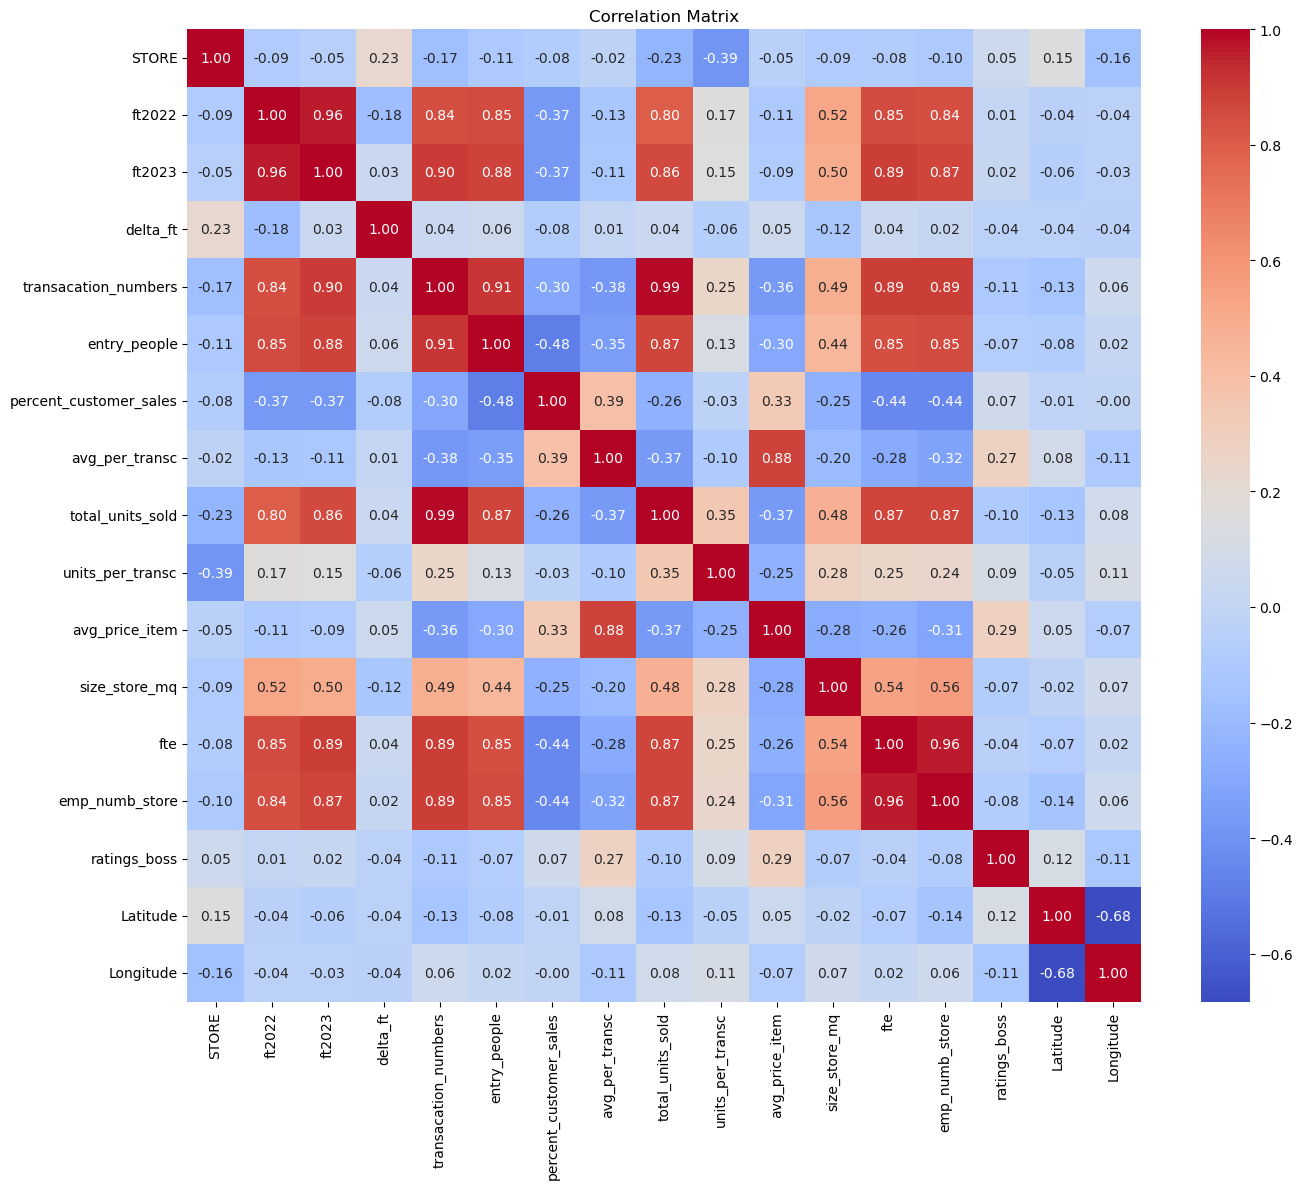

In [30]:
correlation = df.corr()
plt.figure(figsize=(14, 12))  
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout() 
plt.show()

### Insights

Strong positive correlations between financial turnover and transaction numbers (0.84 in 2022 and 0.90 in 2023) indicate that higher sales volumes are closely linked to increased revenue. Maximizing transaction numbers through promotional activities and customer engagement strategies can significantly impact financial success

The number of entry people shows very strong positive correlations with transaction numbers (0.91), highlighting the importance of attracting foot traffic to increase sales. However, a negative correlation with percent customer sales (-0.48) suggests that while more people entering the store boosts potential sales opportunities, not all visits convert into purchases, indicating room for improving sales conversion rates.

A strong positive correlation between average price per item and average per transaction (0.89)  highlights  the influence of product pricing on revenue per sale. Balancing the mix of high-value and affordable items can optimize average spending per transaction.

Total units sold correlate strongly with the number of transactions (0.99) and positively with entry people (0.87), reinforcing the importance of both attracting a high number of visitors and converting those visits into sales to drive volume.

There are strong positive correlations between staffing levels (both full-time employees and total number of employees) and key performance indicators such as financial turnover (0.83 in 2022 and 0.89 in 2023 for full-time employees) and total units sold (0.87). This highlights the critical role of adequate staffing in supporting sales activities and managing operations efficiently.

### Key Strategies:

Implement strategies to convert foot traffic into sales more effectively, such as personalized customer engagement, optimized store layout, and targeted promotions.

Use pricing strategies that encourage higher average transaction values, balancing the appeal of premium products with the accessibility of more affordable items.

Align staffing levels with store size and traffic to ensure high-quality customer service and operational efficiency. Invest in staff training to improve sales skills and product knowledge.

Enhance the in-store experience to attract more visitors and encourage repeat business. This can include store aesthetics, ease of navigation, and the overall shopping environment

In [31]:
df_new = df

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

features = ['transacation_numbers', 'entry_people', 'total_units_sold', 'fte', 'emp_numb_store']
target = ['ft2023']
X = df_new[features]
y = df_new[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R^2 score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')


R^2 score: 0.7982
RMSE: 265271.7431


In [33]:
features_for_prediction = ['transacation_numbers', 'entry_people', 'total_units_sold', 'fte', 'emp_numb_store']
X_new = df_new[features_for_prediction]
new_predictions = model.predict(X_new)

print("Predicted values for new data:")
print(new_predictions)

Predicted values for new data:
[[4566334.45125926]
 [1533370.6157439 ]
 [2266214.70698307]
 [1044248.04421523]
 [2105290.58397888]
 [1762332.11864934]
 [2078163.6340809 ]
 [1428349.40643308]
 [1219058.8328408 ]
 [3633473.08134293]
 [2509913.73478722]
 [1020584.28073418]
 [1307385.88561216]
 [1814761.35735414]
 [1538114.37136231]
 [1909366.37610633]
 [ 724853.63205107]
 [1490103.782771  ]
 [1186117.07775634]
 [1487582.52199506]
 [1800534.90126972]
 [ 592125.08805365]
 [1949742.72470047]
 [1688050.04386097]
 [2612063.21616255]
 [1234794.33339153]
 [1657075.59759835]
 [ 755058.93996675]
 [1222713.24956661]
 [1021882.13640615]
 [1864692.27872256]
 [1521322.87795647]
 [1478237.87718358]
 [1171269.06744559]
 [ 785744.12696115]
 [1919883.21305789]
 [1342226.28539739]
 [1961489.61859668]
 [1299979.71777365]
 [1675656.88202297]
 [1111401.08285944]
 [1519946.82472321]
 [1433292.64118351]
 [1452877.80885712]
 [1167596.07524347]
 [ 807867.80118754]
 [1359673.50164256]
 [1055662.88672514]
 [1193759